# Summative Assessment: Fundermentals of Data Science

#### Student number : 202353550

#### Load pacakages

In [76]:
import pandas as pd
import seaborn as sns
import numpy as np

## Data Cleaning

#### Load Dataset

In [77]:
df=pd.read_csv("T1_A24census0.csv")
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Blue Avenue,Annette,Thompson,78,Head,Married,Female,Retired Licensed conveyancer,NaN,Christian
1,1,Blue Avenue,Iain,Thompson,79,Husband,Married,Male,"Retired Engineer, technical sales",NaN,No Religion
2,2,Blue Avenue,Angela,Wright,43,Head,Single,Female,Magazine journalist,NaN,No Religion
3,3,Blue Avenue,Lynda,Ahmed,34,Head,Married,Female,Unemployed,NaN,No Religion
4,3,Blue Avenue,Howard,Ahmed,35,Husband,Married,Male,Analytical chemist,NaN,No Religion


#### Making copy of data for cleaning

In [78]:
df.to_csv("T1_A24census0_copy.csv",index=False)  #a new provided filename
df_new=pd.read_csv("T1_A24census0_copy.csv")   #read file
df_new.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Blue Avenue,Annette,Thompson,78,Head,Married,Female,Retired Licensed conveyancer,NaN,Christian
1,1,Blue Avenue,Iain,Thompson,79,Husband,Married,Male,"Retired Engineer, technical sales",NaN,No Religion
2,2,Blue Avenue,Angela,Wright,43,Head,Single,Female,Magazine journalist,NaN,No Religion
3,3,Blue Avenue,Lynda,Ahmed,34,Head,Married,Female,Unemployed,NaN,No Religion
4,3,Blue Avenue,Howard,Ahmed,35,Husband,Married,Male,Analytical chemist,NaN,No Religion


In [79]:
headers=df_new.columns
headers

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

##### a : What blank entries are in the data set? How many? Which columns or rows?

In [80]:
df_new.isnull().any()

House Number                     False
Street                           False
First Name                       False
Surname                           True
Age                              False
Relationship to Head of House     True
Marital Status                    True
Gender                           False
Occupation                       False
Infirmity                         True
Religion                          True
dtype: bool

In [81]:
df_new.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             9
Age                                 0
Relationship to Head of House     663
Marital Status                   2024
Gender                              0
Occupation                          0
Infirmity                        8473
Religion                         1039
dtype: int64

##### b: What inconsistencies are there inside a single column? (integers versus floats, etc.) 

In [82]:
df_new.dtypes

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                               int64
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

In [83]:
df_new['Marital Status'].unique()

array(['Married', 'Single', nan, 'Divorced', 'Widowed'], dtype=object)

In [84]:
df_new['Infirmity'].unique()

array([nan, 'Physical Disability', ' ', 'Disabled', 'Mental Disability',
       'Deaf', 'Blind', 'Unknown Infection'], dtype=object)

In [85]:
df_new['Religion'].unique()

array(['Christian', 'No Religion', 'Hindu', nan, 'Muslim', 'Austrian',
       'Sikh', 'Jewish', 'The Fellowship', 'Athiest', 'European', 'T-Rex',
       'Buddist'], dtype=object)

In [86]:
print(df_new.info())  # to check count of enteries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8568 non-null   int64 
 1   Street                         8568 non-null   object
 2   First Name                     8568 non-null   object
 3   Surname                        8559 non-null   object
 4   Age                            8568 non-null   int64 
 5   Relationship to Head of House  7905 non-null   object
 6   Marital Status                 6544 non-null   object
 7   Gender                         8568 non-null   object
 8   Occupation                     8568 non-null   object
 9   Infirmity                      95 non-null     object
 10  Religion                       7529 non-null   object
dtypes: int64(2), object(9)
memory usage: 736.4+ KB
None


In [87]:
df_new.count()

House Number                     8568
Street                           8568
First Name                       8568
Surname                          8559
Age                              8568
Relationship to Head of House    7905
Marital Status                   6544
Gender                           8568
Occupation                       8568
Infirmity                          95
Religion                         7529
dtype: int64

In [88]:
df_new["Age"].unique()  #identified age of zero here    

array([ 78,  79,  43,  34,  35,  49,  51,  15,  14,  11,  32,  36,  64,
        53,  52,  19,  13,  50,  23,  40,  46,  60,  12,   6,  29,  56,
        45,  39,  48,  76,  80,  31,  22,  21,  18,   9,   4,  42,   7,
         0,  41,  17,  70,  27,  24,  44,   3,  55,  77,  65,  74,  66,
        47,  62,  61,  20,  59,  33,   2,  72,  58,  37,   5,   1,  30,
        54,  57,   8,  63,  38,  26,  10,  16,  25,  84,  68,  28,  85,
        87, 103, 100,  73,  69,  88,  67,  75,  81,  92,  93,  71,  94,
        86,  83,  82, 112,  97,  89,  90,  91, 117, 118,  96, 105, 109,
        99, 101,  98,  95, 104, 102, 106])

In [89]:
df_new["Age"].max()

np.int64(118)

In [90]:
df_new["Age"].min()

np.int64(0)

In [91]:
df_new["House Number"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

##### c) Are entries in a single format, with the same number of words you would expect per entry?

In [92]:
headers

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [93]:
#sorted( df_new["First Name"].unique() )  # Check for all feature names to verify that there are single formats

In [94]:
 # Use code below if "Age" had floating values

 #df_new["Age"].astype(int)


### Let's first Clean Religion

In [95]:
df_new["Religion"].unique()

array(['Christian', 'No Religion', 'Hindu', nan, 'Muslim', 'Austrian',
       'Sikh', 'Jewish', 'The Fellowship', 'Athiest', 'European', 'T-Rex',
       'Buddist'], dtype=object)

#### We want to identify the mode of Religion to replace the missing values


In [96]:
#df_new["Religion"].mode()
#OR
df_new["Religion"].value_counts()

Religion
Christian         3726
No Religion       3560
Muslim             117
Hindu               66
Sikh                45
Austrian             3
Jewish               3
The Fellowship       3
Athiest              2
Buddist              2
European             1
T-Rex                1
Name: count, dtype: int64

#### Using the Uniform random generator to fill missing entries under Religion 

##### 1. Gather all valid religions

In [97]:
 # Create an empty list
valid_religions = []

 # Define the list of values to exclude
exclude_values = ["Austrian", "The Fellowship", "European", "T-Rex"]

# Iterate over the "Religion" column and append valid values to the list
for religion in df_new["Religion"]:
    if pd.notna(religion) and religion not in exclude_values: #if cell is not empty and any of the lies
        valid_religions.append(religion) #append religion to valid_religions

# Print the list of valid religions
#print(valid_religions)


##### 2. Create a function to fill missing Religion values

In [98]:

def fill_missing_religions(df_new, column, valid_religions):
    # Iterate over the rows of the DataFrame
    for i in range(len(df_new)):
        # Check if the religion value is missing (NaN)
        if pd.isna(df_new.at[i, column]):
            # Randomly select a religion from the valid_religions list
            random_religion = valid_religions[np.random.randint(0, len(valid_religions))]
            # Fill the missing value with the randomly selected religion
            df_new.at[i, column] = random_religion
    return df_new

# Example usage
df_new = fill_missing_religions(df_new, "Religion", valid_religions)


In [99]:
print(df_new["Religion"].value_counts())

Religion
Christian         4242
No Religion       4053
Muslim             129
Hindu               77
Sikh                51
Jewish               4
Austrian             3
The Fellowship       3
Athiest              2
Buddist              2
European             1
T-Rex                1
Name: count, dtype: int64


In [100]:
df_new[df_new["Religion"] == "Christian"] # number of Christians can also be seen under dataFrame

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Blue Avenue,Annette,Thompson,78,Head,Married,Female,Retired Licensed conveyancer,NaN,Christian
5,4,Blue Avenue,Gail,Hartley,49,Head,Married,Female,Dispensing optician,NaN,Christian
7,4,Blue Avenue,Julia,Hartley,15,Daughter,NaN,Female,Student,NaN,Christian
8,4,Blue Avenue,Tracy,Hartley,14,Daughter,NaN,Female,Student,NaN,Christian
9,4,Blue Avenue,Marian,Hartley,11,Daughter,NaN,Female,Student,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8561,1,Whitehouse Delve,Danny,Jones,35,Son,Single,Male,Planning and development surveyor,NaN,Christian
8563,1,Clarke Barn,Gillian,Griffiths,43,Head,Single,Female,Multimedia specialist,NaN,Christian
8564,1,Clarke Barn,Raymond,Roberts,42,Partner,Single,Male,Hospital pharmacist,NaN,Christian
8565,1,Clarke Barn,Tina,Griffiths,9,Daughter,NaN,Female,Student,NaN,Christian


In [101]:
df_new["Religion"].unique() ### all missing values have been fixed (No nan values)

array(['Christian', 'No Religion', 'Hindu', 'Muslim', 'Sikh', 'Austrian',
       'Jewish', 'The Fellowship', 'Athiest', 'European', 'T-Rex',
       'Buddist'], dtype=object)

### Lies


But first lets visualize Religion on a Bar chart from the cleaned data

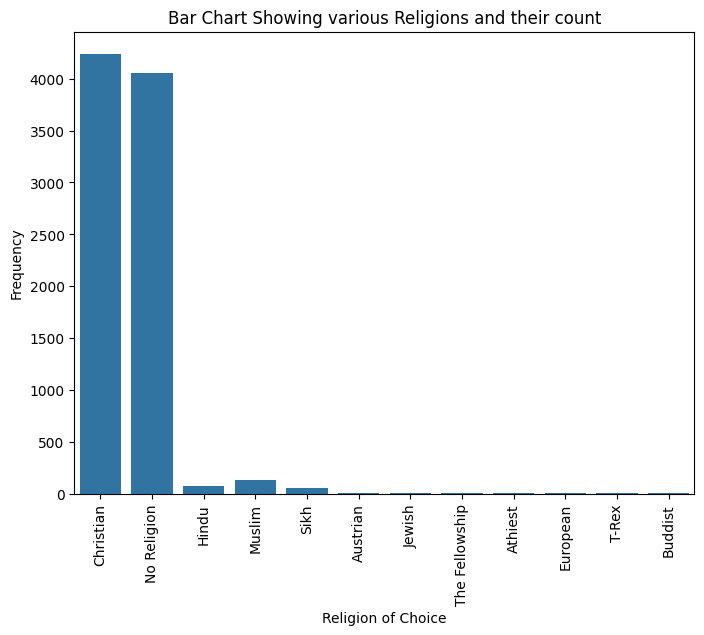

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
reg_plot=sns.countplot(data=df_new,x="Religion")

plt.xlabel("Religion of Choice") 
plt.ylabel("Frequency") 
plt.title("Bar Chart Showing various Religions and their count")

# Rotate x-axis labels if they are too cramped 
plt.xticks(rotation=90) 

#plt.savefig("./religion_bar_chart.png")
# Show the plot 
plt.show()


In [103]:
df_new["Religion"].value_counts()

Religion
Christian         4242
No Religion       4053
Muslim             129
Hindu               77
Sikh                51
Jewish               4
Austrian             3
The Fellowship       3
Athiest              2
Buddist              2
European             1
T-Rex                1
Name: count, dtype: int64

### Targetting the few records, we can see some lies here: Austrian, The Fellowship, European, and T-Rex

### 1.Dealing with Austrian

We can check all individual who are Austrian and their House number

So we confirm they are from the same Household

In [104]:
df_new[ (df_new["Religion"]=='Austrian') & (df_new["House Number"].notnull() ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
504,28,Willow Drive,Victoria,Bolton,42,Head,Married,Female,"Therapist, music",NaN,Austrian
506,28,Willow Drive,Rita,Bolton,16,Daughter,NaN,Female,Student,NaN,Austrian
508,28,Willow Drive,Alexander,Bolton,11,Son,NaN,Male,Student,NaN,Austrian


##### We can then view the religion of all those in House number 28, we might get their true religion from there

In [105]:
df_new[  ( df_new["Religion"].notnull() ) & (df_new["House Number"]== 28 )  ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
129,28,Goldfinch Station,Lydia,Frost,41,Head,Single,Female,Amenity horticulturist,NaN,Christian
130,28,Goldfinch Station,Ben,Robinson,42,Partner,Single,Male,Advertising account executive,NaN,Christian
309,28,Horton Lane,Julian,Jones,57,Head,Single,Male,Local government officer,NaN,Christian
310,28,Horton Lane,Eleanor,Gallagher,55,Partner,Single,Female,Museum/gallery conservator,NaN,Christian
311,28,Horton Lane,Kathleen,Jones,12,Daughter,NaN,Female,Student,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
7812,28,King Flat,Catherine,Cook,7,Daughter,NaN,Female,Student,NaN,Christian
7813,28,King Flat,Robin,Cook,3,Son,NaN,Male,Child,NaN,Christian
8023,28,Gwyneddportal Avenue,Alexandra,Jones-Coles,52,Head,Married,Female,Financial risk analyst,NaN,Christian
8024,28,Gwyneddportal Avenue,Patrick,Jones-Coles,54,Husband,Married,Male,"Teacher, primary school",NaN,Christian


##### We can now confirm if all persons in House 28 have the same religion

In [106]:
df_new[ ( df_new["House Number"]== 28 )  &  ( df_new["Religion"].notnull() ) ]["Religion"].unique()

array(['Christian', 'Austrian', 'No Religion', 'Hindu'], dtype=object)

In [107]:
df_new[ ( df_new["House Number"]== 28 )  &  ( df_new["Religion"].notnull() ) ]["Religion"].value_counts() 

Religion
Christian      48
No Religion    24
Austrian        3
Hindu           3
Name: count, dtype: int64

#### There is no particular single Religion so we can check by their names

##### We can further check the Religion of all the people(by surnames) in that House

In [108]:
df_new[  ( df_new["Religion"].notnull() ) & ( df_new["Surname"]=="Bolton" ) & ( df_new["House Number"]== 28 )  ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
504,28,Willow Drive,Victoria,Bolton,42,Head,Married,Female,"Therapist, music",NaN,Austrian
505,28,Willow Drive,Lewis,Bolton,44,Husband,Married,Male,English as a second language teacher,NaN,No Religion
506,28,Willow Drive,Rita,Bolton,16,Daughter,NaN,Female,Student,NaN,Austrian
507,28,Willow Drive,Jake,Bolton,13,Son,NaN,Male,Student,NaN,No Religion
508,28,Willow Drive,Alexander,Bolton,11,Son,NaN,Male,Student,NaN,Austrian


Finally made it: It is seen that the Bolton family in House number 28 recorded Athiest

However, the youngest son(aged 11) and daughter(aged 16) decided to provide their Religion as Austrian following their mother 

##### finally fix "Austrian" with No Religion


In [109]:
# Replace all Austrian with No religion
df_new["Religion"].replace({"Austrian": "No Religion"}, inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_16576\2057422352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new["Religion"].replace({"Austrian": "No Religion"}, inplace=True)


In [110]:
 # Check Religion value counts in House 28, Austrian is cleared
df_new[ ( df_new["House Number"]== 28 )  &  ( df_new["Religion"].notnull() ) ]["Religion"].value_counts() 

Religion
Christian      48
No Religion    27
Hindu           3
Name: count, dtype: int64

In [111]:
# View the changes made
df_new[( df_new["Surname"]=="Bolton" ) & ( df_new["House Number"]== 28 )  &  ( df_new["Religion"].notnull() ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
504,28,Willow Drive,Victoria,Bolton,42,Head,Married,Female,"Therapist, music",NaN,No Religion
505,28,Willow Drive,Lewis,Bolton,44,Husband,Married,Male,English as a second language teacher,NaN,No Religion
506,28,Willow Drive,Rita,Bolton,16,Daughter,NaN,Female,Student,NaN,No Religion
507,28,Willow Drive,Jake,Bolton,13,Son,NaN,Male,Student,NaN,No Religion
508,28,Willow Drive,Alexander,Bolton,11,Son,NaN,Male,Student,NaN,No Religion


In [112]:
#### The above confirms that it is replaced

### 2. Dealing with The Fellowship:

consider all The fellowship religion members and their House numbers to find a common trend

In [113]:
df_new[ (df_new["Religion"]=='The Fellowship') & (df_new["House Number"].notnull() ) ]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1527,5,Edinburgh Drive,Jane,Baxter,34,Head,Single,Female,Trade mark attorney,NaN,The Fellowship
1528,5,Edinburgh Drive,Shane,Humphreys,41,Partner,Single,Male,Games developer,NaN,The Fellowship
1529,5,Edinburgh Drive,Chelsea,Baxter,0,Daughter,NaN,Female,Child,NaN,The Fellowship


#### They are all in House 5 but different surnames, so we check all people in house 5 who are baxter and humphreys

### Baxter family

In [114]:

df_new[ (df_new["House Number"]==5 ) & (df_new["Surname"]=="Baxter") & (df_new["Religion"].notnull() ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1527,5,Edinburgh Drive,Jane,Baxter,34,Head,Single,Female,Trade mark attorney,NaN,The Fellowship
1529,5,Edinburgh Drive,Chelsea,Baxter,0,Daughter,NaN,Female,Child,NaN,The Fellowship
2514,5,Parsons Fork,Callum,Baxter,64,Head,Single,Male,Commercial art gallery manager,NaN,Christian


#### Here we would have to replace them with Christians in Baxter family alone

In [115]:
# Filter the DataFrame
filtered_df = df_new[ (df_new["House Number"] == 5) & (df_new["Surname"] == "Baxter") & (df_new["Religion"].notnull()) ] #new dataframe

# Replace "The Fellowship" with "Christian" in the "Religion" column of the filtered DataFrame
df_new.loc[filtered_df.index, "Religion"] = filtered_df["Religion"].replace({"The Fellowship": "Christian"})      #locate in old dataframe

### View all Baxters as Christians
df_new[ (df_new["House Number"] == 5) & (df_new["Surname"] == "Baxter") & (df_new["Religion"].notnull()) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1527,5,Edinburgh Drive,Jane,Baxter,34,Head,Single,Female,Trade mark attorney,NaN,Christian
1529,5,Edinburgh Drive,Chelsea,Baxter,0,Daughter,NaN,Female,Child,NaN,Christian
2514,5,Parsons Fork,Callum,Baxter,64,Head,Single,Male,Commercial art gallery manager,NaN,Christian


### Humphreys family

In [116]:
df_new[ (df_new["House Number"]==5 ) & (df_new["Surname"]=="Humphreys") & (df_new["Religion"].notnull() ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1528,5,Edinburgh Drive,Shane,Humphreys,41,Partner,Single,Male,Games developer,NaN,The Fellowship
3784,5,Sagittariussalt Drive,Amber,Humphreys,27,Lodger,Single,Female,Media buyer,NaN,No Religion


#### The other female is not related to him so we modify the fucntion to randomly replace the lie

In [117]:
fil_dat = df_new[ (df_new["House Number"]==5 ) & (df_new["Surname"]=="Humphreys") & (df_new["Religion"].notnull() ) ]


def fill_lies_religions(df_new, column, valid_religions):
    
    # Filter the DataFrame for the specific conditions
    fil_dat = df[(df["House Number"] == 5) & (df["Surname"] == "Humphreys") & (df[column].notnull())]
    
    # Iterate over the rows of the filtered DataFrame
    for i in fil_dat.index:
        # Check if the religion value is "The Fellowship"
        if df_new.at[i, column] == "The Fellowship":
            # Randomly select a religion from the valid_religions list
            random_religion = valid_religions[np.random.randint(0, len(valid_religions))]
            # Replace "The Fellowship" with the randomly selected religion
            df_new.at[i, column] = random_religion
    return df_new

# Example usage
df_new = fill_lies_religions(df_new, "Religion", valid_religions)



In [118]:
df_new[ (df_new["House Number"]==5 ) & (df_new["Surname"]=="Humphreys") & (df_new["Religion"].notnull() ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1528,5,Edinburgh Drive,Shane,Humphreys,41,Partner,Single,Male,Games developer,NaN,No Religion
3784,5,Sagittariussalt Drive,Amber,Humphreys,27,Lodger,Single,Female,Media buyer,NaN,No Religion


### 3. Dealing with The European:

In [119]:
df_new[ (df_new["Religion"]=='European') ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6410,32,Northnail Close,Douglas,Hughes,29,NaN,Single,Male,"Engineer, agricultural",NaN,European


In [120]:
 #Just one person with that Surname in house 32
df_new[  ( df_new["Religion"].notnull()  & ( df_new["Surname"]=="Hughes" ) &(df_new["House Number"]==32) ) ]             

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6410,32,Northnail Close,Douglas,Hughes,29,NaN,Single,Male,"Engineer, agricultural",NaN,European


In [121]:

def fill_lies_religions(df_new, column, valid_religions):
    
    # Filter the DataFrame for the specific conditions
    euro=df_new[ (df_new["Religion"]=='European') ]
    
    # Iterate over the rows of the filtered DataFrame
    for i in euro.index:
        # Check if the religion value is "The European"
        if df_new.at[i, column] == "European":
            # Randomly select a religion from the valid_religions list
            random_religion = valid_religions[np.random.randint(0, len(valid_religions))]
            # Replace "The Fellowship" with the randomly selected religion
            df_new.at[i, column] = random_religion
    return df_new

# Example usage
df_new = fill_lies_religions(df_new, "Religion", valid_religions)

In [122]:
df_new[  ( df_new["Religion"].notnull()  & ( df_new["Surname"]=="Hughes" ) &(df_new["House Number"]==32) ) ]             

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6410,32,Northnail Close,Douglas,Hughes,29,NaN,Single,Male,"Engineer, agricultural",NaN,Christian


In [123]:
 # It changes to Christian

### 4. Dealing with The T-Rex:

In [124]:
df_new[ (df_new["Religion"]=='T-Rex') ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6552,55,Northnail Close,Chelsea,Mason,30,NaN,Single,Female,"Teacher, early years/pre",NaN,T-Rex


In [125]:
 # One person in the data with that surname and house number 55
df_new[ (df_new["Religion"].notnull() ) & (df_new["Surname"]=="Mason") & (df_new["House Number"]==55) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6552,55,Northnail Close,Chelsea,Mason,30,NaN,Single,Female,"Teacher, early years/pre",NaN,T-Rex


In [126]:

def fill_lies_religions(df_new, column, valid_religions):
    
    # Filter the DataFrame for the specific conditions
    trex=df_new[ (df_new["Religion"]=='T-Rex') ]

    
    # Iterate over the rows of the filtered DataFrame
    for i in trex.index:
        # Check if the religion value is "The T-Rex"
        if df_new.at[i, column] == "T-Rex":
            # Randomly select a religion from the valid_religions list
            random_religion = valid_religions[np.random.randint(0, len(valid_religions))]
            # Replace "The Fellowship" with the randomly selected religion
            df_new.at[i, column] = random_religion
    return df_new

# Example usage
df_new = fill_lies_religions(df_new, "Religion", valid_religions)

In [127]:
df_new[ (df_new["Religion"].notnull() ) & (df_new["Surname"]=="Mason") & (df_new["House Number"]==55) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6552,55,Northnail Close,Chelsea,Mason,30,NaN,Single,Female,"Teacher, early years/pre",NaN,No Religion


In [128]:
 # Also changed to No-Religion

##### Histogram for Religion

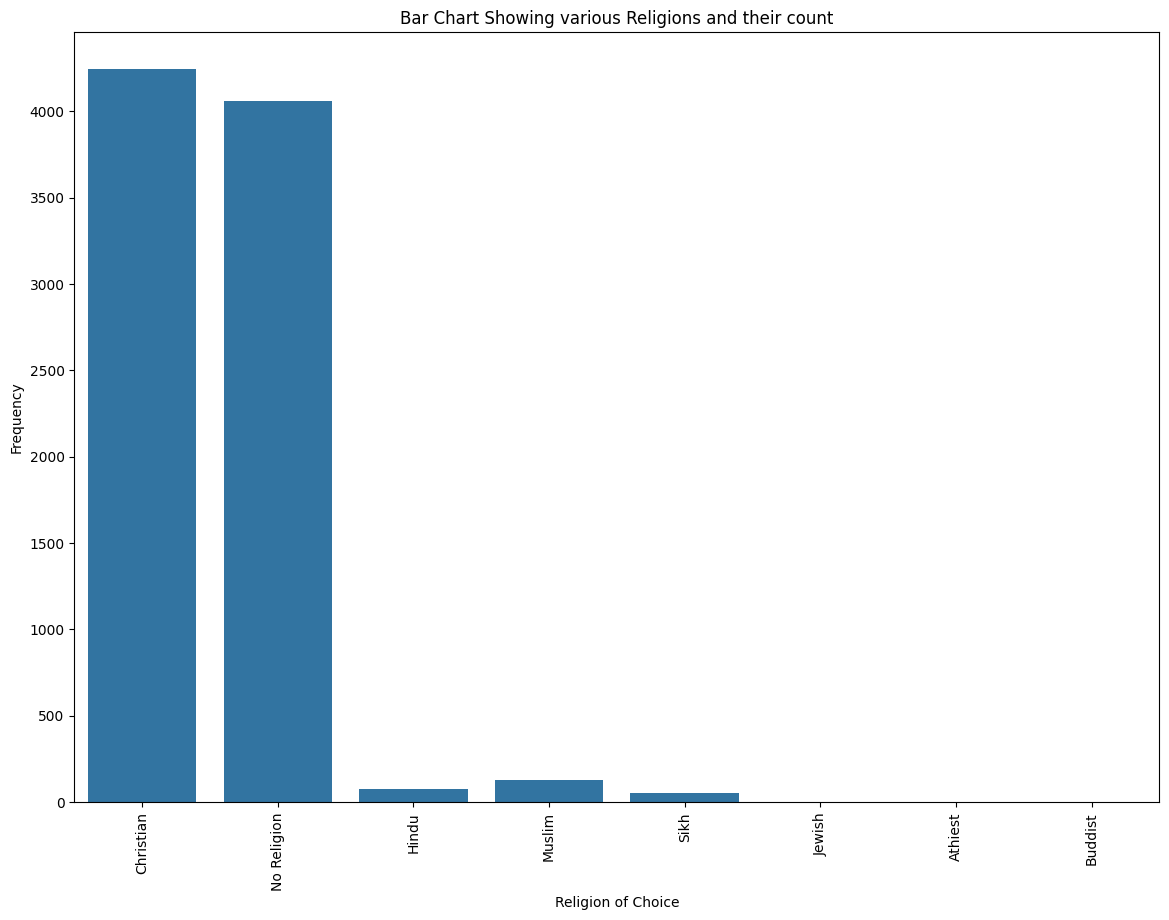

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
reg_plot=sns.countplot(data=df_new,x="Religion")

plt.xlabel("Religion of Choice") 
plt.ylabel("Frequency") 
plt.title("Bar Chart Showing various Religions and their count")

# Rotate x-axis labels if they are too cramped 
plt.xticks(rotation=90) 

#plt.savefig("./religion_bar_chart.png")
# Show the plot 
plt.show()


### Cleaning Age


In [130]:
df_new[df_new["Age"]>122] # There's nobody above 122 years

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [131]:
df_new["Age"].value_counts()
# The highest here is  not 106, so no one is telling lies

Age
18     167
19     159
45     153
43     148
8      146
      ... 
109      1
101      1
95       1
102      1
106      1
Name: count, Length: 111, dtype: int64

In [132]:
 # We can see that the high age values in the data are few individuals 
 # We leave such values because it is possible to have such age values 

In [133]:
df_new["Age"].max()  # Highest age

np.int64(118)

In [134]:
df_new["Age"].min() # Lowest age 

np.int64(0)

##### 1. Does anyone have a negative age? Identify them as well. 

In [135]:
df_new[df_new["Age"] < 0] #no one is found, that's great

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


##### 2.Do you think there are “underage” mothers or fathers lying about their ages

In [136]:
df_new[ (df_new["Age"] < 19 ) & ( df_new["Relationship to Head of House"] == "Husband" ) ]  # No husband is below 18 years

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [137]:
df_new[ (df_new["Age"] < 19 ) & ( df_new["Relationship to Head of House"] == "Wife" ) ] # No wife is below 18 years

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


##### 3.Do you think there are any children whose parents have inflated their age

(so they can enter the workforce) or deflated their age (so they attend school and parents potentially gain government support cash)? 

In [138]:
df_new[ (df_new["Age"].notnull() ) & ( df_new["Occupation"] == "Child" ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
50,3,Marshall Close,Roy,Morris,4,Son,NaN,Male,Child,NaN,No Religion
58,4,Marshall Close,Neil,Chambers,0,Son,NaN,Male,Child,NaN,Christian
86,1,Goldfinch Station,Thomas,Hughes,3,Son,NaN,Male,Child,NaN,No Religion
87,1,Goldfinch Station,Raymond,Hughes,0,Son,NaN,Male,Child,NaN,Christian
111,15,Goldfinch Station,Jemma,Price,0,Daughter,NaN,Female,Child,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8382,20,Mahoganypush Drive,Gregory,Kirby,2,Grandson,NaN,Male,Child,NaN,No Religion
8409,1,Hardy Manorhouse,Alexandra,Marshall,2,Niece,NaN,Female,Child,NaN,No Religion
8442,1,Elizabeth Hold,Kirsty,Brown,3,Daughter,NaN,Female,Child,NaN,Hindu
8443,1,Elizabeth Hold,Sophie,Brown,0,Daughter,NaN,Female,Child,NaN,Christian


In [139]:
 # Since they are many, it is prudent to use the .unique method to view the unique age values
df_new[ (df_new["Age"].notnull() ) & ( df_new["Occupation"] == "Child" ) ]["Age"].unique()

array([4, 0, 3, 2, 1])

##### 4. Do you think there are any under-aged children who are married? 

In 2022, the median age for marriage couples was 35 years for men and 33 years for women

The majority of divorces occur after several years of marriage

It is less common for individuals to marry and divorce at a young age (23)


##### 4.1 Underaged Married

###### Below 18- change all to not applicable 

In [140]:
df_new[ ( df_new["Age"] <= 23 ) & ( df_new["Marital Status"]== "Married" ) ]["Age"].unique()

array([20, 22,  7,  6,  8, 21,  5, 10, 23, 18, 19,  4, 17, 16, 15,  2,  0,
       13,  3])

In [141]:
# Filter DataFrame for individuals under 18 who are married
b18 = df_new[(df_new["Age"] < 18) & (df_new["Marital Status"] == "Married")]

# Replace "Married" with "Not Applicable" for these individuals
df_new.loc[b18.index, "Marital Status"] = b18["Marital Status"].replace({"Married":"Not Applicable"})


In [142]:
df_new[ ( df_new["Age"] <= 23 ) & ( df_new["Marital Status"]== "Married" ) ]["Age"].unique()

array([20, 22, 21, 23, 18, 19])

In [143]:
# Filter DataFrame for individuals under 24 who are married
b24 = df_new[(df_new["Age"] <= 23) & (df_new["Marital Status"] == "Married")]

# Replace "Married" with "Single" for these individuals
df_new.loc[b24.index, "Marital Status"] = b24["Marital Status"].replace({"Married": "Single"})


In [144]:
df_new[ ( df_new["Age"] <= 23 ) & ( df_new["Marital Status"]== "Married" ) ] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


##### 4.2 Underaged Divorced

if you cannot be married by age 23

It is less likey to be divorced by age 25

In [146]:
df_new[ ( df_new["Age"] <= 25 ) & ( df_new["Marital Status"]== "Divorced" ) ]["Age"].unique()

array([21, 22, 19, 18, 20, 24, 23, 11, 25,  8,  7])

##### Below 18, change all to Not Applicable

In [149]:
# Filter DataFrame for individuals under 18 who are divorced
d18 = df_new[(df_new["Age"] < 18) & (df_new["Marital Status"] == "Divorced")]

# Replace "Divorced" with "Not Applicable" for these individuals
df_new.loc[d18.index, "Marital Status"] = d18["Marital Status"].replace({"Divorced": "Not Applicable"})



In [150]:
df_new[ ( df_new["Age"] <= 25 ) & ( df_new["Marital Status"]== "Divorced" ) ]["Age"].unique()

array([21, 22, 19, 18, 20, 24, 23, 25])

In [151]:
d26=df_new[ ( df_new["Age"] <= 25 ) & ( df_new["Marital Status"]== "Divorced" ) ]
d26
df_new.loc[d26.index,"Marital Status"] = d26["Marital Status"].replace({"Divorced":"Single"})

In [152]:
 # All changed 
df_new[ ( df_new["Age"] <=25 ) & ( df_new["Marital Status"]== "Divorced" ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


##### 4.3 Underaged Widowed

In [153]:
df_new[ ( df_new["Age"] <= 25 ) & ( df_new["Marital Status"]== "Widowed" ) ]["Age"].unique()


array([22, 19, 21, 24, 25, 23, 18,  4, 20,  0])

##### Below 18, Change all to Not Applicable

In [154]:
w18=df_new[ ( df_new["Age"] < 18 ) & ( df_new["Marital Status"]== "Widowed" ) ]

df_new.loc[w18.index,"Marital Status"]=w18["Marital Status"].replace({"Widowed":"Not Applicable"})

In [155]:
df_new[ ( df_new["Age"] <= 25 ) & ( df_new["Marital Status"]== "Widowed" ) ]["Age"].unique()

array([22, 19, 21, 24, 25, 23, 18, 20])

#### Change the rest to Single

In [156]:
w26=df_new[ ( df_new["Age"] <= 25 ) & ( df_new["Marital Status"]== "Widowed" ) ]

df_new.loc[w26.index,"Marital Status"] = w26["Marital Status"].replace({"Widowed":"Single"})

In [157]:
 # All Changed
df_new[ ( df_new["Age"] <=25 ) & ( df_new["Marital Status"]== "Widowed" ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


##### 4.4 Child Married

In [158]:
df_new[ ( df_new["Occupation"]=="Child" ) & ( df_new["Marital Status"]== "Married" ) ] #Just wanted to confirm

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


#### Unemployed or retired children 

In [159]:
df_new[(df_new["Age"]<18) & df_new["Occupation"].str.contains("Unemployed|Retired",case=False,na=False) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4165,49,Brennan Road,Brian,Fletcher,11,Head,Single,Male,Unemployed,NaN,No Religion
4998,67,Gardner Square,Yvonne,Chan,7,Head,Not Applicable,Female,Unemployed,NaN,No Religion
6797,61,Perth Lane,Amelia,Butler,17,Head,Single,Female,Unemployed,NaN,No Religion


In [160]:
 # Change all to Child
unemp_kids = df_new[(df_new["Age"]<18) & df_new["Occupation"].str.contains("Unemployed|Retired",case=False,na=False) ]

df_new.loc[unemp_kids.index,"Occupation"] = unemp_kids["Occupation"].replace({"Unemployed":"Child"})

In [161]:
df_new[(df_new["Age"]<18) & df_new["Occupation"].str.contains("Unemployed|Retired",case=False,na=False) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Surnames

In [162]:
df_new["Surname"].isnull().sum()

np.int64(9)

In [163]:
df_new[ df_new["Surname"].isna() ]    # view missing surnames

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2124,45,Horseshoe Drive,Clare,NaN,73,Wife,Married,Female,Retired Dietitian,NaN,Christian
2605,61,Parsons Fork,Matthew,NaN,60,Husband,Married,Male,Medical technical officer,NaN,No Religion
2950,5,Elizabethsplit Lane,Edward,NaN,28,Husband,Married,Male,Industrial/product designer,NaN,No Religion
3608,8,Lionpick Lane,Leon,NaN,29,Husband,Married,Male,Immigration officer,NaN,Hindu
5437,185,Gardner Square,Brian,NaN,72,Husband,Married,Male,Retired Make,NaN,No Religion
5487,199,Gardner Square,Stuart,NaN,58,Husband,Married,Male,"Scientist, marine",NaN,Christian
6929,110,Perth Lane,Eileen,NaN,75,Wife,Married,Female,Retired Advertising account planner,NaN,Christian
6986,131,Perth Lane,Leonard,NaN,47,Husband,Married,Male,Therapeutic radiographer,NaN,No Religion
7601,119,Palmer Parkway,Philip,NaN,80,Husband,Married,Male,Retired Furniture conservator/restorer,NaN,No Religion


##### Get a list of all their house numbers to aid you in filtering

In [164]:
df_new[ df_new["Surname"].isna() ]["House Number"].unique()

array([ 45,  61,   5,   8, 185, 199, 110, 131, 119])

#### House 45

In [165]:
df_new[ (df_new["House Number"]== 45) & (  (df_new["Surname"].isna()) |  (df_new["Surname"].notna())  ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
412,45,Horton Lane,Josephine,Simmons,51,Head,Married,Female,Quantity surveyor,NaN,Christian
413,45,Horton Lane,Brandon,Simmons,53,Husband,Married,Male,"Therapist, art",NaN,Christian
414,45,Horton Lane,Charlotte,Simmons,26,Daughter,Single,Female,Web designer,NaN,Christian
415,45,Horton Lane,Alex,Simmons,22,Son,Single,Male,University Student,NaN,Christian
416,45,Horton Lane,Samantha,Simmons,21,Daughter,Single,Female,University Student,NaN,No Religion
417,45,Horton Lane,Sheila,Simmons,18,Daughter,Single,Female,Student,NaN,No Religion
418,45,Horton Lane,Maureen,Simmons,18,Daughter,Single,Female,Student,NaN,No Religion
419,45,Horton Lane,Jamie,Simmons,15,Son,NaN,Male,Student,NaN,No Religion
420,45,Horton Lane,Dominic,Simmons,11,Son,NaN,Male,Student,NaN,Christian
421,45,Horton Lane,Lynn,Simmons,10,Daughter,NaN,Female,Student,NaN,Christian


#### The House number and Street will help you identify the surnames(Horseshoe Drive)- make a narrow search

In [166]:
df_new[ (df_new["House Number"]==45) & (df_new["Street"]=="Horseshoe Drive") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2123,45,Horseshoe Drive,Joseph,Robertson-Collins,75,Head,Married,Male,"Retired Radiographer, diagnostic",NaN,Christian
2124,45,Horseshoe Drive,Clare,NaN,73,Wife,Married,Female,Retired Dietitian,NaN,Christian


In [167]:
# Filter the DataFrame
sur1 = df_new[(df_new["House Number"] == 45) & (df_new["Street"] == "Horseshoe Drive")]

# Fill NaN values in the "Surname" column
df_new.loc[sur1.index, "Surname"] = sur1["Surname"].fillna("Robertson-Collins")


In [168]:
df_new[(df_new["House Number"] == 45) & (df_new["Street"] == "Horseshoe Drive")]  # View changes made

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2123,45,Horseshoe Drive,Joseph,Robertson-Collins,75,Head,Married,Male,"Retired Radiographer, diagnostic",NaN,Christian
2124,45,Horseshoe Drive,Clare,Robertson-Collins,73,Wife,Married,Female,Retired Dietitian,NaN,Christian


#### House 61

Parsons Fork

In [169]:
df_new[ (df_new["House Number"]== 61) &  (df_new["Street"]=="Parsons Fork") ]  # best to use

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2604,61,Parsons Fork,Katy,Butler,59,Head,Married,Female,Actor,NaN,Christian
2605,61,Parsons Fork,Matthew,NaN,60,Husband,Married,Male,Medical technical officer,NaN,No Religion
2606,61,Parsons Fork,Iain,Butler-Fletcher,34,Son,Single,Male,Risk analyst,NaN,Christian


In [170]:
### Filter this frame
sur2= df_new[ (df_new["House Number"]== 61) &  (df_new["Street"]=="Parsons Fork") ] 

### Fill missing value
df_new.loc[sur2.index,"Surname"]=sur2["Surname"].fillna("Butler")


In [171]:
df_new[ (df_new["House Number"]== 61) &  (df_new["Street"]=="Parsons Fork") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2604,61,Parsons Fork,Katy,Butler,59,Head,Married,Female,Actor,NaN,Christian
2605,61,Parsons Fork,Matthew,Butler,60,Husband,Married,Male,Medical technical officer,NaN,No Religion
2606,61,Parsons Fork,Iain,Butler-Fletcher,34,Son,Single,Male,Risk analyst,NaN,Christian


#### House 5

Elizabethsplit Lane

In [172]:
df_new[ (df_new["House Number"]== 5) & (df_new["Street"]=="Elizabethsplit Lane") & (  (df_new["Surname"].isna()) |  (df_new["Surname"].notna())  ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2949,5,Elizabethsplit Lane,Irene,Jones,31,Head,Married,Female,"Therapist, music",NaN,Christian
2950,5,Elizabethsplit Lane,Edward,NaN,28,Husband,Married,Male,Industrial/product designer,NaN,No Religion
2951,5,Elizabethsplit Lane,Lesley,Jones-Bartlett,9,Daughter,NaN,Female,Student,NaN,Christian
2952,5,Elizabethsplit Lane,Mary,Jones-Bartlett,6,Daughter,NaN,Female,Student,Mental Disability,Christian
2953,5,Elizabethsplit Lane,Gail,Jones-Bartlett,3,Daughter,NaN,Female,Child,NaN,No Religion


In [173]:
### Filter 
sur3=df_new[ (df_new["House Number"]== 5) & (df_new["Street"]=="Elizabethsplit Lane") & (  (df_new["Surname"].isna()) |  (df_new["Surname"].notna())  ) ]

df_new.loc[sur3.index,"Surname"]=sur3["Surname"].fillna("Jones")


In [174]:
df_new[ (df_new["House Number"]== 5) & (df_new["Street"]=="Elizabethsplit Lane") & (  (df_new["Surname"].isna()) |  (df_new["Surname"].notna())  ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2949,5,Elizabethsplit Lane,Irene,Jones,31,Head,Married,Female,"Therapist, music",NaN,Christian
2950,5,Elizabethsplit Lane,Edward,Jones,28,Husband,Married,Male,Industrial/product designer,NaN,No Religion
2951,5,Elizabethsplit Lane,Lesley,Jones-Bartlett,9,Daughter,NaN,Female,Student,NaN,Christian
2952,5,Elizabethsplit Lane,Mary,Jones-Bartlett,6,Daughter,NaN,Female,Student,Mental Disability,Christian
2953,5,Elizabethsplit Lane,Gail,Jones-Bartlett,3,Daughter,NaN,Female,Child,NaN,No Religion


#### House 8

Lionpick Lane Street

In [175]:
df_new[ (df_new["House Number"]== 8) & (df_new["Street"]=="Lionpick Lane") & (  (df_new["Surname"].isna()) |  (df_new["Surname"].notna())  ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3607,8,Lionpick Lane,Karen,Ryan,24,Head,Married,Female,"Clinical scientist, histocompatibility and imm...",NaN,Hindu
3608,8,Lionpick Lane,Leon,NaN,29,Husband,Married,Male,Immigration officer,NaN,Hindu
3609,8,Lionpick Lane,Grace,Ryan-Kay,3,Daughter,NaN,Female,Child,NaN,Hindu


In [176]:
sur4= df_new[ (df_new["House Number"]== 8) & (df_new["Street"]=="Lionpick Lane") & (  (df_new["Surname"].isna()) |  (df_new["Surname"].notna())  ) ]

df_new.loc[sur4.index,"Surname"]=sur4["Surname"].fillna("Ryan")


In [177]:
df_new[ (df_new["House Number"]== 8) & (df_new["Street"]=="Lionpick Lane") & (  (df_new["Surname"].isna()) |  (df_new["Surname"].notna())  ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3607,8,Lionpick Lane,Karen,Ryan,24,Head,Married,Female,"Clinical scientist, histocompatibility and imm...",NaN,Hindu
3608,8,Lionpick Lane,Leon,Ryan,29,Husband,Married,Male,Immigration officer,NaN,Hindu
3609,8,Lionpick Lane,Grace,Ryan-Kay,3,Daughter,NaN,Female,Child,NaN,Hindu


### House 185

Gardner Square street

In [178]:
df_new[ (df_new["House Number"]== 185) & (df_new["Street"]=="Gardner Square") & (  (df_new["Surname"].isna()) |  (df_new["Surname"].notna())  ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5436,185,Gardner Square,Fiona,Gray-Jackson,70,Head,Married,Female,"Retired Surveyor, mining",NaN,No Religion
5437,185,Gardner Square,Brian,NaN,72,Husband,Married,Male,Retired Make,NaN,No Religion


In [179]:
sur5= df_new[ (df_new["House Number"]== 185) & (df_new["Street"]=="Gardner Square") & (  (df_new["Surname"].isna()) |  (df_new["Surname"].notna())  ) ]

df_new.loc[sur5.index,"Surname"]=sur5["Surname"].fillna("Gray-Jackson")


In [180]:
df_new[ (df_new["House Number"]== 185) & (df_new["Street"]=="Gardner Square") & (  (df_new["Surname"].isna()) |  (df_new["Surname"].notna())  ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5436,185,Gardner Square,Fiona,Gray-Jackson,70,Head,Married,Female,"Retired Surveyor, mining",NaN,No Religion
5437,185,Gardner Square,Brian,Gray-Jackson,72,Husband,Married,Male,Retired Make,NaN,No Religion


### House 199

Gadner Square


In [181]:
df_new[ (df_new["House Number"]== 199) & (df_new["Street"]=="Gardner Square") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5486,199,Gardner Square,Lorraine,Gray,55,Head,Married,Female,Unemployed,NaN,Christian
5487,199,Gardner Square,Stuart,NaN,58,Husband,Married,Male,"Scientist, marine",NaN,Christian
5488,199,Gardner Square,Amber,Gray-Jenkins,29,Daughter,Single,Female,"Engineer, mining",NaN,No Religion


In [182]:
sur6= df_new[ (df_new["House Number"]== 199) & (df_new["Street"]=="Gardner Square")  ]

df_new.loc[sur6.index,"Surname"]=sur6["Surname"].fillna("Gray")


In [183]:
df_new[ (df_new["House Number"]== 199) & (df_new["Street"]=="Gardner Square") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5486,199,Gardner Square,Lorraine,Gray,55,Head,Married,Female,Unemployed,NaN,Christian
5487,199,Gardner Square,Stuart,Gray,58,Husband,Married,Male,"Scientist, marine",NaN,Christian
5488,199,Gardner Square,Amber,Gray-Jenkins,29,Daughter,Single,Female,"Engineer, mining",NaN,No Religion


### House 110

Perth Lane street

In [184]:
df_new[ (df_new["House Number"]== 110) & (df_new["Street"]=="Perth Lane") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6928,110,Perth Lane,Ian,Roberts-Smith,77,Head,Married,Male,Retired Pathologist,NaN,Christian
6929,110,Perth Lane,Eileen,NaN,75,Wife,Married,Female,Retired Advertising account planner,NaN,Christian


In [185]:
sur7= df_new[ (df_new["House Number"]== 110) & (df_new["Street"]=="Perth Lane")  ]

df_new.loc[sur7.index,"Surname"] = sur7["Surname"].fillna("Roberts-Smith")



In [186]:
df_new[ (df_new["House Number"]== 110) & (df_new["Street"]=="Perth Lane") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6928,110,Perth Lane,Ian,Roberts-Smith,77,Head,Married,Male,Retired Pathologist,NaN,Christian
6929,110,Perth Lane,Eileen,Roberts-Smith,75,Wife,Married,Female,Retired Advertising account planner,NaN,Christian


### House 131

Perth Lane

In [187]:
df_new[ (df_new["House Number"]== 131) & (df_new["Street"]=="Perth Lane") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6985,131,Perth Lane,Claire,Parker,45,Head,Married,Female,Fashion designer,NaN,No Religion
6986,131,Perth Lane,Leonard,NaN,47,Husband,Married,Male,Therapeutic radiographer,NaN,No Religion
6987,131,Perth Lane,Dennis,Parker-Roberts,8,Son,NaN,Male,Student,NaN,No Religion
6988,131,Perth Lane,Glen,Parker-Roberts,2,Son,NaN,Male,Child,Physical Disability,No Religion
6989,131,Perth Lane,Elliot,Parker-Roberts,0,Son,NaN,Male,Child,NaN,No Religion


In [188]:
sur8= df_new[ (df_new["House Number"]== 131) & (df_new["Street"]=="Perth Lane")  ]

df_new.loc[sur8.index,"Surname"] = sur8["Surname"].fillna("Parker")


In [189]:
df_new[ (df_new["House Number"]== 131) & (df_new["Street"]=="Perth Lane") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6985,131,Perth Lane,Claire,Parker,45,Head,Married,Female,Fashion designer,NaN,No Religion
6986,131,Perth Lane,Leonard,Parker,47,Husband,Married,Male,Therapeutic radiographer,NaN,No Religion
6987,131,Perth Lane,Dennis,Parker-Roberts,8,Son,NaN,Male,Student,NaN,No Religion
6988,131,Perth Lane,Glen,Parker-Roberts,2,Son,NaN,Male,Child,Physical Disability,No Religion
6989,131,Perth Lane,Elliot,Parker-Roberts,0,Son,NaN,Male,Child,NaN,No Religion


### House 119

Palmer Parkway

In [190]:
df_new[ (df_new["House Number"]== 119) & (df_new["Street"]=="Palmer Parkway") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7600,119,Palmer Parkway,Louise,Wilson,82,Head,Married,Female,"Retired Psychologist, occupational",NaN,No Religion
7601,119,Palmer Parkway,Philip,NaN,80,Husband,Married,Male,Retired Furniture conservator/restorer,NaN,No Religion
7602,119,Palmer Parkway,Carole,Wilson-Grant,48,Daughter,Single,Female,Volunteer coordinator,,No Religion
7603,119,Palmer Parkway,Timothy,Wilson-Grant,45,Son,Divorced,Male,Homeopath,NaN,No Religion
7604,119,Palmer Parkway,Emma,Wilson-Grant,43,Daughter,Single,Female,Pension scheme manager,NaN,No Religion
7605,119,Palmer Parkway,Ross,Robinson,39,Son,Single,Male,Dance movement psychotherapist,NaN,No Religion


In [191]:
sur9= df_new[ (df_new["House Number"]== 119) & (df_new["Street"]=="Palmer Parkway")  ]

df_new.loc[sur9.index,"Surname"] = sur9["Surname"].fillna("Wilson")
df_new[ (df_new["House Number"]== 119) & (df_new["Street"]=="Palmer Parkway") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7600,119,Palmer Parkway,Louise,Wilson,82,Head,Married,Female,"Retired Psychologist, occupational",NaN,No Religion
7601,119,Palmer Parkway,Philip,Wilson,80,Husband,Married,Male,Retired Furniture conservator/restorer,NaN,No Religion
7602,119,Palmer Parkway,Carole,Wilson-Grant,48,Daughter,Single,Female,Volunteer coordinator,,No Religion
7603,119,Palmer Parkway,Timothy,Wilson-Grant,45,Son,Divorced,Male,Homeopath,NaN,No Religion
7604,119,Palmer Parkway,Emma,Wilson-Grant,43,Daughter,Single,Female,Pension scheme manager,NaN,No Religion
7605,119,Palmer Parkway,Ross,Robinson,39,Son,Single,Male,Dance movement psychotherapist,NaN,No Religion


In [192]:
df_new.isnull().any()

House Number                     False
Street                           False
First Name                       False
Surname                          False
Age                              False
Relationship to Head of House     True
Marital Status                    True
Gender                           False
Occupation                       False
Infirmity                         True
Religion                         False
dtype: bool

In [193]:
df_new.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     663
Marital Status                   2024
Gender                              0
Occupation                          0
Infirmity                        8473
Religion                            0
dtype: int64

### Infirmity

Fill all missing infirmity values with "Unknown"

In [194]:
df_new["Infirmity"].fillna(value="Unknown",inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16576\1308748700.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new["Infirmity"].fillna(value="Unknown",inplace=True)


In [195]:
df_new["Infirmity"].unique()

array(['Unknown', 'Physical Disability', ' ', 'Disabled',
       'Mental Disability', 'Deaf', 'Blind', 'Unknown Infection'],
      dtype=object)

In [196]:
# Filter DataFrame for rows where "Infirmity" is an empty string
inf = df_new[df_new["Infirmity"] == ' ']

# Replace empty string with "Unknown" in the "Infirmity" column
df_new.loc[inf.index, "Infirmity"] = inf["Infirmity"].replace(' ', "Unknown")


In [197]:
df_new["Infirmity"].unique()

array(['Unknown', 'Physical Disability', 'Disabled', 'Mental Disability',
       'Deaf', 'Blind', 'Unknown Infection'], dtype=object)

### Marital Status

In [198]:
 # Check unique entries under Marital Status
df_new["Marital Status"].unique()

array(['Married', 'Single', nan, 'Divorced', 'Widowed', 'Not Applicable'],
      dtype=object)

In [199]:
 # Check the minimum age for Married people
df_new[ df_new["Marital Status"]=="Married"]["Age"].min()

np.int64(24)

In [200]:
df_new[ (df_new["Marital Status"]=="Married") ]["Age"].unique()

array([ 78,  79,  34,  35,  49,  51,  32,  36,  53,  52,  76,  80,  46,
        48,  40,  39,  45,  43,  41,  65,  62,  61,  55,  31,  33,  47,
        54,  57,  64,  70,  58,  84,  68,  63,  37,  44,  56,  50,  85,
        87,  60,  26,  25, 103, 100,  42,  66,  67,  77,  75,  81,  74,
        92,  93,  30,  27,  71,  69,  29,  38,  59,  73,  72,  28,  82,
        24,  88,  90,  86,  83,  94, 117, 118,  89,  96,  91, 105, 109,
        99, 101,  95,  98, 104, 102, 106])

In [201]:
 # Get a view of those with missing Marital Status
df_new[ (df_new["Marital Status"].isna() ) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,4,Blue Avenue,Julia,Hartley,15,Daughter,NaN,Female,Student,Unknown,Christian
8,4,Blue Avenue,Tracy,Hartley,14,Daughter,NaN,Female,Student,Unknown,Christian
9,4,Blue Avenue,Marian,Hartley,11,Daughter,NaN,Female,Student,Unknown,Christian
15,6,Blue Avenue,Glen,Wilson,14,Grandson,NaN,Male,Student,Unknown,No Religion
19,7,Blue Avenue,Peter,Price,13,Son,NaN,Male,Student,Unknown,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
8552,1,Rowe Manor,Donna,Bull,17,Granddaughter,NaN,Female,Student,Unknown,Christian
8555,1,Newton Fortress,Beth,Newton,7,Daughter,NaN,Female,Student,Unknown,No Religion
8565,1,Clarke Barn,Tina,Griffiths,9,Daughter,NaN,Female,Student,Unknown,Christian
8566,1,Clarke Barn,Matthew,Griffiths,6,Son,NaN,Male,Student,Unknown,Christian


In [202]:
df_new[ (df_new["Marital Status"].isna() ) ]["Age"].unique()

 # Can be seen that they are minors

array([15, 14, 11, 13, 12,  6,  9,  4,  7,  0, 17,  3,  2,  5,  1,  8, 10,
       16])

##### Function to fill Marital Status missing values

Since they are all minors, we fill with Not Applicable

In [203]:
 # Function to fill all missing Marital Status entries as Single
def minors(df_new):
    fil = df_new[df_new["Marital Status"].isna()]
    df_new.loc[fil.index, "Marital Status"] = fil["Marital Status"].fillna("Not Applicable")
    return df_new

df_new = minors(df_new)


In [204]:
df_new["Marital Status"].unique()

 # All missing values filled

array(['Married', 'Single', 'Not Applicable', 'Divorced', 'Widowed'],
      dtype=object)

### Relationship to Head of House

In [205]:
 # View unique entries for Relationship to Head of House
df_new["Relationship to Head of House"].unique()

array(['Head', 'Husband', 'Daughter', 'Lodger', 'Grandson', 'Son', nan,
       'Wife', 'Granddaughter', 'Partner', 'Niece', 'Visitor', 'Sibling',
       'Adopted Son', 'Cousin', 'Nephew', 'Adopted Daughter',
       'Step-Daughter', 'Step-Son', 'Adopted Granddaughter',
       'Daughter-in-law'], dtype=object)

In [206]:
 # View Missing entries
df_new[df_new["Relationship to Head of House"].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
23,9,Blue Avenue,Marcus,Brown,40,NaN,Single,Male,Transport planner,Unknown,No Religion
24,9,Blue Avenue,Pauline,Doyle,46,NaN,Single,Female,Adult guidance worker,Unknown,Christian
25,9,Blue Avenue,Clive,O'Donnell,60,NaN,Single,Male,Dance movement psychotherapist,Unknown,Christian
26,9,Blue Avenue,Karl,Hunter,35,NaN,Single,Male,"Surveyor, planning and development",Unknown,Hindu
32,1,Marshall Close,Natasha,Bentley,56,NaN,Single,Female,"Scientist, product/process development",Unknown,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
8474,1,Heart Farmhouse,Georgina,O'Connor,58,NaN,Single,Female,"Psychologist, clinical",Unknown,Christian
8521,1,Foxglove Lodge,Robin,Ward,53,NaN,Single,Male,Make,Unknown,Muslim
8522,1,Foxglove Lodge,Valerie,Wood,50,NaN,Single,Female,Cabin crew,Unknown,Christian
8523,1,Foxglove Lodge,Marilyn,Thomas,63,NaN,Single,Female,Senior tax professional/tax inspector,Unknown,No Religion


In [207]:
df_new[df_new["Relationship to Head of House"].isna()]["House Number"].unique()

array([  9,   1,  21,   5,  14,  31,  42,  43,   8,  11,  30,   3,  20,
        22,   6,   4,   7,  10,   2,  16,  17,  29,  37,  44,  26,  27,
        18,  19,  25,  15,  36,  13,  24,  72, 101,  40,  47,  56,  58,
        49,  81,  92,  98,  99, 107, 119, 122, 136, 139, 160,  33,  45,
        60,  75,  79, 100, 113, 117, 120, 127, 133, 148, 150, 152, 156,
       163, 173,  41,  46,  51,  55,  57,  71,  74,  86,  96, 137, 143,
       154, 178, 183, 195,  12,  23,  32,  35,  59,  62, 109, 114, 123,
        48,  63,  67,  95, 134])

##### Fill Husband and Wife (when similar surnames are located)

In [208]:
 # If Married and Gender== Male, fill with Husband
 # If Married and Gender ==Female, fill with Wife

def fill_relationship(df_new):
    # Iterate over rows with missing 'Relationship to Head of House'
    for index, row in df_new[df_new['Relationship to Head of House'].isna()].iterrows():
        # Find other people in the same house with the same surname
        same_house = df_new[(df_new['House Number'] == row['House Number']) & (df_new['Surname'] == row['Surname'])]
        # Check if any of them are married
        married = same_house[same_house['Marital Status'] == 'Married']
        if not married.empty:
            # Check gender and fill accordingly
            if married['Gender'].iloc[0] == 'Male':
                df_new.at[index, 'Relationship to Head of House'] = 'Husband'
            elif married['Gender'].iloc[0] == 'Female':
                df_new.at[index, 'Relationship to Head of House'] = 'Wife'
    return df_new

# Example usage
df_new = fill_relationship(df_new)


##### Fill Son and Daughter (when similar surnames are located)

In [209]:
 # If Single and Gender== Male, fill with Son
 # If Single and Gender ==Female, fill with Daughter

def fill_relationship1(df_new):
    # Iterate over rows with missing 'Relationship to Head of House'
    for index, row in df_new[df_new['Relationship to Head of House'].isna()].iterrows():
        # Find other people in the same house with the same surname
        same_house = df_new[(df_new['House Number'] == row['House Number']) & (df_new['Surname'] == row['Surname'])]
        # Check if any of them are single
        single = same_house[same_house['Marital Status'] == 'Single']
        if not single.empty:
            # Check gender and fill accordingly
            if single['Gender'].iloc[0] == 'Male':
                df_new.at[index, 'Relationship to Head of House'] = 'Son'
            elif single['Gender'].iloc[0] == 'Female':
                df_new.at[index, 'Relationship to Head of House'] = 'Daughter'
    return df_new

# Example usage
df_new = fill_relationship1(df_new)


In [210]:
 # View Dataframe to see the rest of missing values
df_new[df_new["Relationship to Head of House"].isna()]
 
 # The rest are seen to be Divorced or Widowed 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
459,11,Willow Drive,Hollie,Newton,63,NaN,Divorced,Female,Unemployed,Unknown,Christian
731,22,Howe Courts,Naomi,Williams,56,NaN,Divorced,Female,"Journalist, newspaper",Unknown,No Religion
1325,2,Morar Crescent,Mary,Campbell,37,NaN,Widowed,Female,Trade mark attorney,Unknown,No Religion
3011,5,Sagittarius Views,Ellie,Morris,64,NaN,Divorced,Female,"Runner, broadcasting/film/video",Unknown,Christian
3226,25,Iris Square,Elizabeth,Kay,27,NaN,Divorced,Female,"Lighting technician, broadcasting/film/video",Unknown,No Religion
3227,25,Iris Square,Lorraine,Edwards,52,NaN,Divorced,Female,Unemployed,Unknown,Christian
4263,75,Brennan Road,Joyce,Reid,60,NaN,Widowed,Female,Unemployed,Unknown,No Religion
6452,40,Northnail Close,Pamela,Barry,8,NaN,Not Applicable,Female,Student,Unknown,No Religion
6453,40,Northnail Close,Danny,Barry,6,NaN,Not Applicable,Male,Student,Unknown,No Religion
6454,40,Northnail Close,Brenda,Barry,5,NaN,Not Applicable,Female,Student,Unknown,No Religion


#### Those remaining do not have same surname with anyone  

We fill all as head, because:

they all seen to be widowed or divorced

they are all matured individuals


In [211]:
df_new['Relationship to Head of House'].fillna('Head', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16576\2424589877.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['Relationship to Head of House'].fillna('Head', inplace=True)


In [212]:
df_new.isna().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

#### Save cleaned file 

In [213]:
df_new.to_csv("T1_A24census0_cleaned.csv",index=False)
df1=pd.read_csv("T1_A24census0_cleaned.csv")

### Tasks

(a) What should be built on an unoccupied plot of land that the local government wishes to 
develop? Your choices are: 
 
i.High-density housing. This should be built if the population is significantly expanding.  

ii.Low-density housing. This should be built if the population is “affluent” and there is demand 
for large family housing.  

iii.Train station. There are potentially a lot of commuters in the town and building a train station 
could take pressure off the roads. But how will you identify commuters?  

iv.Religious building. There is already one place of worship for Catholics in the town. Is there 
demand for a second Church (if so, which denomination?), or for a different religious building?  

v.Emergency medical building. Not a full hospital, but a minor injuries centre. This should be 
built if there are many injuries or future pregnancies likely in the population.  

vi.Something else?  

Whichever you choose, you must justify it from the data set provided to you and argue it is a priority 
against other choices. 

In [214]:
df1.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Blue Avenue,Annette,Thompson,78,Head,Married,Female,Retired Licensed conveyancer,Unknown,Christian
1,1,Blue Avenue,Iain,Thompson,79,Husband,Married,Male,"Retired Engineer, technical sales",Unknown,No Religion
2,2,Blue Avenue,Angela,Wright,43,Head,Single,Female,Magazine journalist,Unknown,No Religion
3,3,Blue Avenue,Lynda,Ahmed,34,Head,Married,Female,Unemployed,Unknown,No Religion
4,3,Blue Avenue,Howard,Ahmed,35,Husband,Married,Male,Analytical chemist,Unknown,No Religion


### Exploratory Analysis

#### Age Distribution of Males and Females

In [215]:
male_ages=df1[df1["Gender"]=="Male"]["Age"]
#print(male_ages)
df_ma=pd.DataFrame(male_ages)

female_ages=df1[ df1["Gender"]=="Female"]["Age"]
#female_ages
df_fa=pd.DataFrame(female_ages)

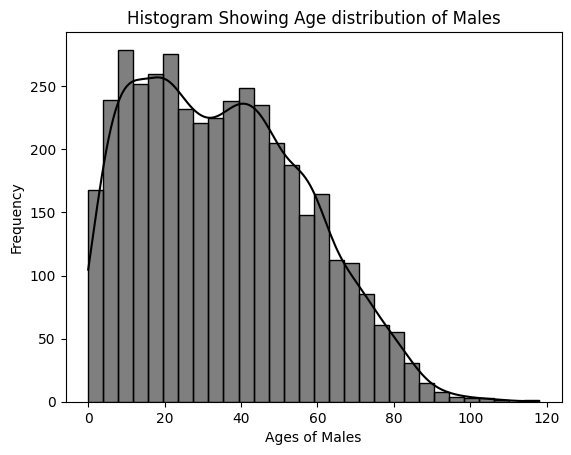

In [216]:
%matplotlib inline
import matplotlib.pyplot as plt

#plt.figure(figsize=(12,10))

sns.histplot(data=df_ma,x="Age",binwidth=4,color="black",kde=True)

plt.xlabel("Ages of Males") 
plt.ylabel("Frequency") 
plt.title("Histogram Showing Age distribution of Males",)

plt.savefig("./MaleAge_dist_bar_chart.png")
# Show the plot 
plt.show()



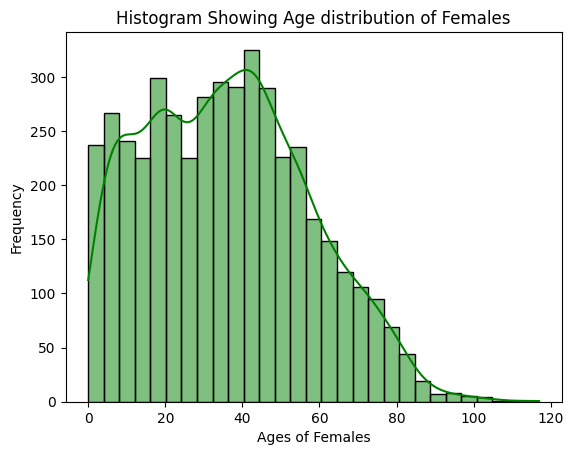

In [217]:

sns.histplot(data=df_fa,x="Age",binwidth=4,color="green",kde=True)

plt.xlabel("Ages of Females") 
plt.ylabel("Frequency") 
plt.title("Histogram Showing Age distribution of Females",)

#plt.savefig("./FemaleAge_dist_bar_chart.png")
# Show the plot 
plt.show()



#### Hypothesis Testing 

#####  Hypothesis testing (Two Sample means T-test) 

##### Null Hypothesis:
There is no significant difference in the mean ages between males and females.

##### Alternative Hypothesis:
There is a significant difference in the mean ages between males and females.


In [218]:
from scipy.stats import ttest_ind

In [219]:
 # Extract ages of males and females
male_ages=df1[df1["Gender"]=="Male"]["Age"]
female_ages=df1[ df1["Gender"]=="Female"]["Age"]

In [220]:
 # Perform the two-sample t-test 
stat, p_value = ttest_ind(male_ages, female_ages)

In [221]:
 # Print the results 
print(f"T-statistic: {stat}")
print(f"P-value: {p_value}")

T-statistic: -1.9569193342433462
P-value: 0.05038938897812989


In [222]:
# Interpret the results 
alpha = 0.05 # significance level 
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean ages between males and females.") 
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean ages between males and females.")

Fail to reject the null hypothesis. There is no significant difference in the mean ages between males and females.


#### Hypothesis Testing 

#####  Hypothesis testing (Two Sample z-test-proportion) 

##### Null Hypothesis:
There is no significant difference between the proportion of males and females.

##### Alternative Hypothesis:
There is a significant difference between the proportion of males and females.

In [223]:
from statsmodels.stats.proportion import proportions_ztest

# Count the number of males
num_males = df1[df1["Gender"] == "Male"].shape[0]

# Count the number of females
num_females = df1[df1["Gender"] == "Female"].shape[0]

# Calculate the total population
total_population = df1.shape[0]

# Perform the proportion test
count = [num_males, num_females]
nobs = [total_population, total_population]
stat, p_value = proportions_ztest(count, nobs)

# Print the results
print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the proportion of males and females.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the proportion of males and females.")


Z-statistic: -6.56967256203552
P-value: 5.0426025656678054e-11
Reject the null hypothesis. There is a significant difference between the proportion of males and females.


In [224]:
print(f"There are {num_males} males")

rate_males=(num_males/df1.shape[0])*1000
print(f"The rate of males {round(rate_males,0)}")

There are 4069 males
The rate of males 475.0


In [225]:
print(f"There are {num_females} females")

rate_females=(num_females/df1.shape[0])*1000
print(f"The rate of females {round(rate_females,0)}")

There are 4499 females
The rate of females 525.0


### 1. Age pyramid

In [226]:
 # Make changes to get sum of ages within ranges below for both Males and Females
 # Age:['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9']

df1[ (df1["Gender"] == "Female" ) &  (df1["Age"] >=00) & (df1["Age"] <= 9 ) ]["Age"].count()

np.int64(572)

In [227]:
age_p2=pd.DataFrame ( {
    "Age":['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9'],
    "Male":[ -8, -17, -81, -195,-305, -474, -599, -572, -620, -655,-543 ],
    "Female":[ 7, 15, 86, 225, 326, 532, 752, 726, 626, 632, 572 ]
})

AgeClass = ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9']

[Text(0.5, 0, 'Population Count'), Text(0, 0.5, 'Age Group')]

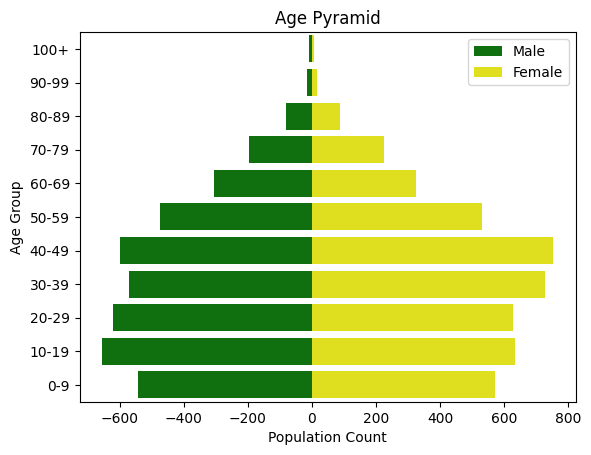

In [229]:
age_pyramid=sns.barplot(data=age_p2,x="Male",y="Age",order=AgeClass,
color=("green"),label="Male")

age_pyramid=sns.barplot(data=age_p2,x="Female",y="Age",order=AgeClass,
color=("yellow"),label="Female")

age_pyramid.legend()
plt.title("Age Pyramid")  

age_pyramid.set(xlabel='Population Count', ylabel='Age Group')
#plt.savefig("Age_pyramid_project_data.png")

### 2. Unemployment and Employment trends

Are certain ages more likely to be unemployed than others? 

In [230]:
 # Consider umemployed or retired exclusing children
# Filter DataFrame for unemployed individuals aged above 15
unemployed = df1[
    (df1["Age"] > 15) & 
    (df1["Occupation"].str.contains("Unemployed", case=False, na=False))
]

unemployed


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3,3,Blue Avenue,Lynda,Ahmed,34,Head,Married,Female,Unemployed,Unknown,No Religion
73,4,Goldfinch Fall,Jeffrey,Parkinson-Godfrey,27,Grandson,Single,Male,Unemployed,Unknown,No Religion
76,5,Goldfinch Fall,Shirley,Gardiner,51,Head,Divorced,Female,Unemployed,Unknown,Christian
121,22,Goldfinch Station,Martin,Sutton,76,Head,Widowed,Male,Unemployed,Unknown,No Religion
128,27,Goldfinch Station,Gordon,Khan,70,Head,Widowed,Male,Unemployed,Physical Disability,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
8441,1,Elizabeth Hold,Katy,Brown,33,Head,Divorced,Female,Unemployed,Unknown,Muslim
8491,1,Stewart Warehouse,Olivia,Marsden,59,Partner,Single,Female,Unemployed,Mental Disability,No Religion
8506,1,Libra Windmill,Jill,Turner,37,Cousin,Single,Female,Unemployed,Unknown,Christian
8529,1,Gill Cabin,Anthony,Wade,23,Son,Single,Male,Unemployed,Unknown,Christian


In [231]:
len(unemployed)

528

In [232]:
 # Consider Children
children=df1[df1["Occupation"]=="Child"]
children

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
50,3,Marshall Close,Roy,Morris,4,Son,Not Applicable,Male,Child,Unknown,No Religion
58,4,Marshall Close,Neil,Chambers,0,Son,Not Applicable,Male,Child,Unknown,Christian
86,1,Goldfinch Station,Thomas,Hughes,3,Son,Not Applicable,Male,Child,Unknown,No Religion
87,1,Goldfinch Station,Raymond,Hughes,0,Son,Not Applicable,Male,Child,Unknown,Christian
111,15,Goldfinch Station,Jemma,Price,0,Daughter,Not Applicable,Female,Child,Unknown,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8382,20,Mahoganypush Drive,Gregory,Kirby,2,Grandson,Not Applicable,Male,Child,Unknown,No Religion
8409,1,Hardy Manorhouse,Alexandra,Marshall,2,Niece,Not Applicable,Female,Child,Unknown,No Religion
8442,1,Elizabeth Hold,Kirsty,Brown,3,Daughter,Not Applicable,Female,Child,Unknown,Hindu
8443,1,Elizabeth Hold,Sophie,Brown,0,Daughter,Not Applicable,Female,Child,Unknown,Christian


In [233]:
len(children)

456

In [234]:
children["Age"].value_counts()

Age
4     104
3      96
2      93
0      81
1      79
11      1
7       1
17      1
Name: count, dtype: int64

In [235]:
inactive_labour = df1[df1["Occupation"].str.contains("Unemployed|Retired|Child", case=False, na=False)]
inactive_labour

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Blue Avenue,Annette,Thompson,78,Head,Married,Female,Retired Licensed conveyancer,Unknown,Christian
1,1,Blue Avenue,Iain,Thompson,79,Husband,Married,Male,"Retired Engineer, technical sales",Unknown,No Religion
3,3,Blue Avenue,Lynda,Ahmed,34,Head,Married,Female,Unemployed,Unknown,No Religion
36,2,Marshall Close,Michelle,Jackson,76,Head,Married,Female,Retired Forensic psychologist,Unknown,Christian
37,2,Marshall Close,Gregory,Jackson,80,Husband,Married,Male,Retired Farm manager,Unknown,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8515,1,Carlisle Lodge,Christian,Davis,72,Husband,Married,Male,Retired Industrial buyer,Unknown,No Religion
8529,1,Gill Cabin,Anthony,Wade,23,Son,Single,Male,Unemployed,Unknown,Christian
8549,1,Rowe Manor,Christopher,Smith,68,Husband,Married,Male,Unemployed,Unknown,No Religion
8558,1,Whitehouse Delve,Sandra,Jones,73,Head,Married,Female,Retired Graphic designer,Unknown,Christian


In [236]:
len(inactive_labour)

1720

#### Ages of unemployed


In [237]:
unemployed["Age"].unique()

array([34, 27, 51, 76, 70, 56, 40, 55, 44, 29, 46, 53, 33, 38, 23, 36, 37,
       30, 52, 63, 49, 26, 41, 66, 31, 42, 50, 62, 32, 67, 54, 68, 61, 24,
       59, 18, 65, 39, 58, 43, 45, 64, 35, 48, 28, 80, 71, 57, 75, 81, 74,
       25, 86, 21, 60, 73, 47, 78, 77, 69, 20, 82, 88])

In [238]:
unemployed["Age"].min()

np.int64(18)

In [239]:
unemployed["Age"].max()

np.int64(88)

##### Unemployment rate

In [240]:
rate_unemployment= (len(unemployed)/(df1.shape[0]))*1000
print(f"The rate of unemployment is {round(rate_unemployment,0)} per 1000")

The rate of unemployment is 62.0 per 1000


#### Histogram for Unemployment

In [241]:
unemp_dat=pd.DataFrame(unemployed) # Make umemployed individuals a dataframe

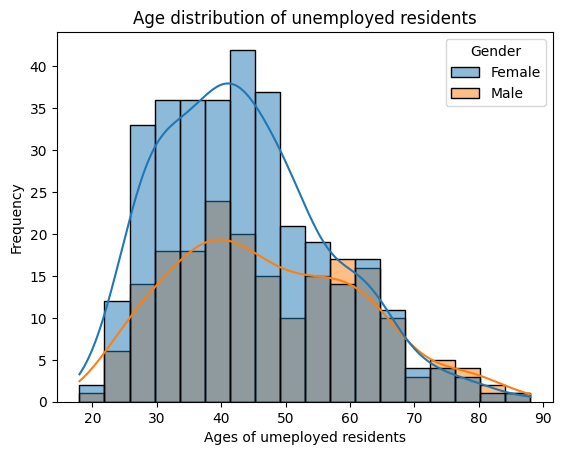

In [242]:
sns.histplot(data=unemp_dat,x="Age",binwidth=4,hue="Gender",kde=True)
plt.xlabel("Ages of umeployed residents")
plt.ylabel("Frequency")
plt.title("Age distribution of unemployed residents")
#plt.legend()
#plt.savefig("UnemployedHist.png")
plt.show()

#### Employment

In [243]:
employed = df1[ (df1["Age"].between(16, 66)) & ~(df1["Occupation"].str.contains("Unemployed|Retired|Child", case=False, na=False))]
len(employed)

5419

In [244]:
employed["Age"].unique()

array([43, 35, 49, 51, 32, 36, 64, 53, 52, 19, 50, 23, 40, 46, 60, 29, 56,
       45, 39, 48, 31, 22, 21, 18, 42, 41, 17, 27, 24, 44, 55, 65, 66, 47,
       62, 61, 20, 59, 34, 33, 58, 37, 30, 54, 57, 63, 38, 26, 16, 25, 28])

In [245]:
employed["Age"].min()

np.int64(16)

In [246]:
employed["Age"].max()

np.int64(66)

##### Employment rate

In [247]:
rate_employment= (len(employed)/(df1.shape[0]))*1000
print(f"The rate of employment is {round(rate_employment,0)} per 1000")

The rate of employment is 632.0 per 1000


#### Histogram for employment

In [249]:
emp_dat=pd.DataFrame(employed)

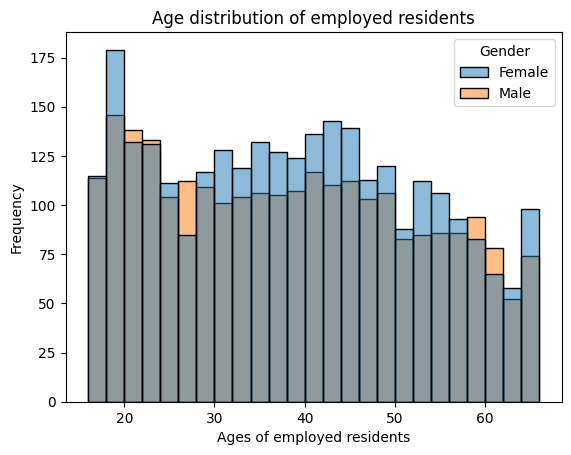

In [250]:

sns.histplot(data=emp_dat,x="Age",binwidth=2,hue="Gender")
plt.xlabel("Ages of employed residents")
plt.ylabel("Frequency")
plt.title("Age distribution of employed residents")
#plt.legend()
#plt.savefig("employedHist.png")
plt.show()

#### Dependency Ratio


dep=(Numb of dependents(0-14) and 67+

Work=Working-Age Population(15-66)

``
D.R=(dep/Work)*100
``


In [251]:
dep=df1[ ( (df1["Age"]>=0) & (df1["Age"]<15)) | (df1["Age"]>=67) ]
dep

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Blue Avenue,Annette,Thompson,78,Head,Married,Female,Retired Licensed conveyancer,Unknown,Christian
1,1,Blue Avenue,Iain,Thompson,79,Husband,Married,Male,"Retired Engineer, technical sales",Unknown,No Religion
8,4,Blue Avenue,Tracy,Hartley,14,Daughter,Not Applicable,Female,Student,Unknown,Christian
9,4,Blue Avenue,Marian,Hartley,11,Daughter,Not Applicable,Female,Student,Unknown,Christian
15,6,Blue Avenue,Glen,Wilson,14,Grandson,Not Applicable,Male,Student,Unknown,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
8558,1,Whitehouse Delve,Sandra,Jones,73,Head,Married,Female,Retired Graphic designer,Unknown,Christian
8559,1,Whitehouse Delve,Charles,Jones,74,Husband,Married,Male,Retired Futures trader,Unknown,No Religion
8565,1,Clarke Barn,Tina,Griffiths,9,Daughter,Not Applicable,Female,Student,Unknown,Christian
8566,1,Clarke Barn,Matthew,Griffiths,6,Son,Not Applicable,Male,Student,Unknown,Christian


In [252]:
work=df1[ (df1["Age"]>=15) & (df1["Age"]<=66) ]
work

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,2,Blue Avenue,Angela,Wright,43,Head,Single,Female,Magazine journalist,Unknown,No Religion
3,3,Blue Avenue,Lynda,Ahmed,34,Head,Married,Female,Unemployed,Unknown,No Religion
4,3,Blue Avenue,Howard,Ahmed,35,Husband,Married,Male,Analytical chemist,Unknown,No Religion
5,4,Blue Avenue,Gail,Hartley,49,Head,Married,Female,Dispensing optician,Unknown,Christian
6,4,Blue Avenue,Martyn,Hartley,51,Husband,Married,Male,Community arts worker,Unknown,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
8560,1,Whitehouse Delve,Wendy,Jones,38,Daughter,Single,Female,"Therapist, nutritional",Unknown,Christian
8561,1,Whitehouse Delve,Danny,Jones,35,Son,Single,Male,Planning and development surveyor,Unknown,Christian
8562,1,Whitehouse Delve,Donna,Jones,34,Daughter,Divorced,Female,Food technologist,Unknown,No Religion
8563,1,Clarke Barn,Gillian,Griffiths,43,Head,Single,Female,Multimedia specialist,Unknown,Christian


In [253]:
Dep_ratio=(len(dep)/len(work))*1000
print(f"The dependancy ratio is {round(Dep_ratio,2)} per 1000")

The dependancy ratio is 416.67 per 1000


### Hypothesis Testing (Unemployment Trends)

In [254]:
from scipy import stats

##### 1. Hypothesis testing (Two Sample means T-test) 

##### Null hypothesis:
There is no significant difference between the mean ages of unemployed and employed residents.

##### Alternative hypothesis:
There is a significant difference between the mean ages of unemployed and employed residents.

In [255]:
 # Separate the data into two groups 

unemployed_ages = df1[(df1["Occupation"].str.contains("Unemployed", case=False, na=False)) & ((df1["Age"] > 15)) ]["Age"]

 # Consider ages below 15 as not part of the employment gap
employed_ages = df1[
    ~(df1["Occupation"].str.contains("Unemployed|Retired|Child", case=False, na=False)) & (df1["Age"] > 15)
]["Age"]

##### Perform t-test

In [256]:
# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(unemployed_ages, employed_ages)

##### Print the results 

In [257]:
print(f"T-statistic: {t_stat}") 
print(f"P-value: {p_value}")

T-statistic: 10.02885645404966
P-value: 1.7433780746968733e-23


##### Interpret the results 

In [258]:
alpha = 0.05 # significance level 
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the mean ages of unemployed and employed residents.") 
else: 
    print("Fail to reject the null hypothesis. There is no significant difference between the mean ages of unemployed and employed residents.")

Reject the null hypothesis. There is a significant difference between the mean ages of unemployed and employed residents.


##### 2. Hypothesis testing (Two Sample z-test proportion)

##### Null hypothesis:
There is no significant difference between the proportion of unemployed and employed residents.

##### Alternative hypothesis:
There is a significant difference between the proportion of unemployed and employed residents.

In [259]:
#!pip install statsmodels

In [260]:
from statsmodels.stats.proportion import proportions_ztest

# Count the number of employed and unemployed residents
num_employed = df1[~df1["Occupation"].str.contains("Unemployed|Retired|Child", case=False, na=False) & (df1["Age"] > 15)].shape[0]
num_unemployed = df1[df1["Occupation"].str.contains("Unemployed", case=False, na=False) & (df1["Age"] > 15)].shape[0]

# Calculate the total population
total_population = num_employed + num_unemployed

# Perform the proportion test
count = [num_employed, num_unemployed]
nobs = [total_population, total_population]
stat, p_value = proportions_ztest(count, nobs)

# Print the results
print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the proportion of employed and unemployed residents.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the proportion of employed and unemployed residents.")


Z-statistic: 90.10351607469353
P-value: 0.0
Reject the null hypothesis. There is a significant difference between the proportion of employed and unemployed residents.


### 3. Religion

In [261]:
df1["Religion"].unique()

array(['Christian', 'No Religion', 'Hindu', 'Muslim', 'Sikh', 'Jewish',
       'Athiest', 'Buddist'], dtype=object)

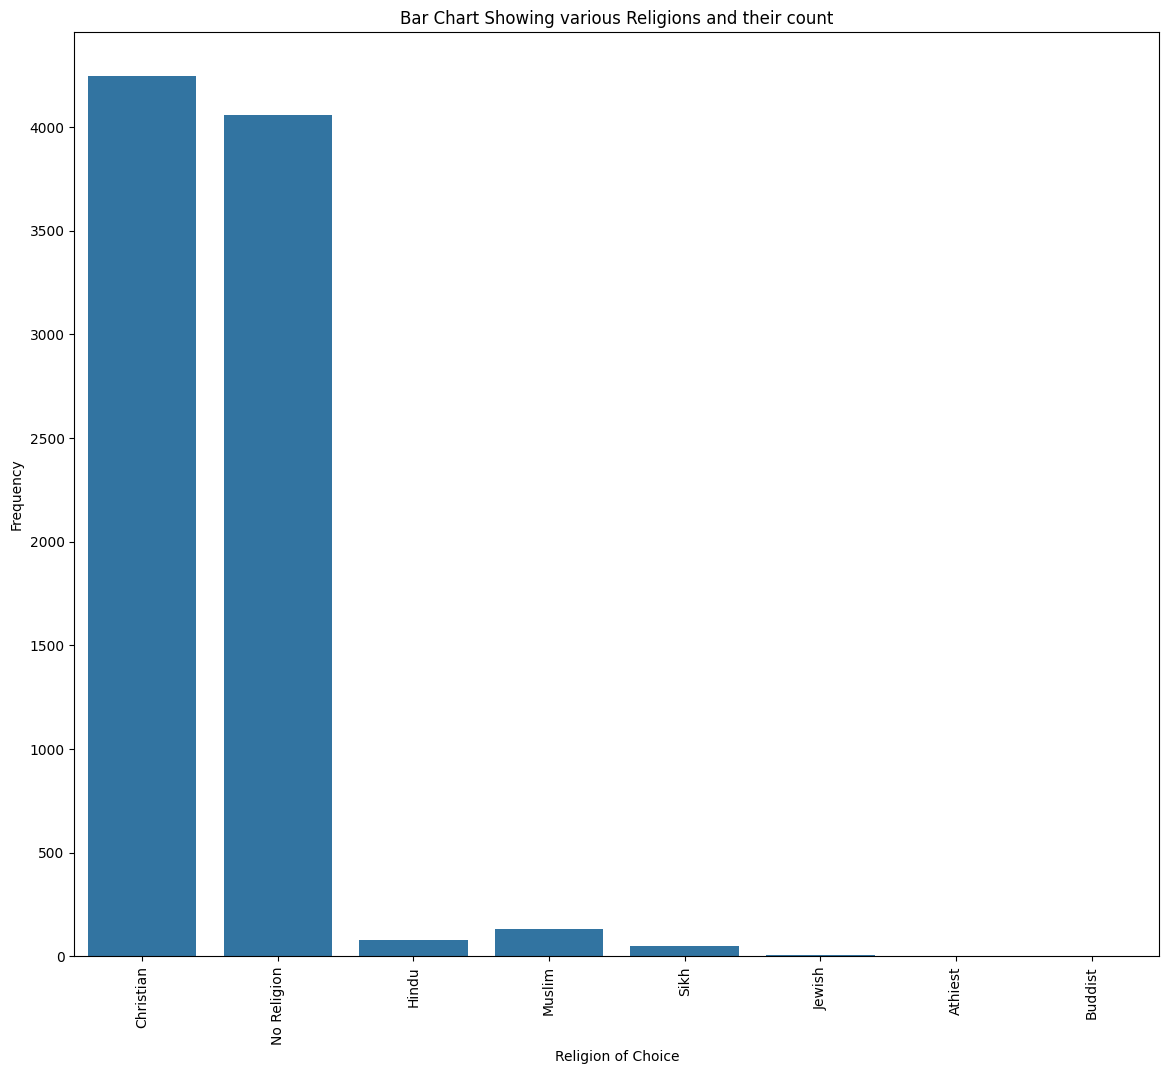

In [262]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
reg_plot=sns.countplot(data=df1,x="Religion")

plt.xlabel("Religion of Choice") 
plt.ylabel("Frequency") 
plt.title("Bar Chart Showing various Religions and their count")

# Rotate x-axis labels if they are too cramped 
plt.xticks(rotation=90) 

#plt.savefig("./religion_bar_chart.png")
# Show the plot 
plt.show()


In [263]:
# Filter DataFrame for children who are Christians
chris_child = df1[
    (df1["Age"]<19) & (df1["Religion"] == "Christian") ]

print(f"The number of children who are Christians : {chris_child.shape[0]}" )

ad_chri= df1[(df1["Age"]>=19) & (df1["Religion"] == "Christian")]

print(f"The number of adults who are Christians : {ad_chri.shape[0]}")

inh_rate=(chris_child.shape[0]/ad_chri.shape[0])*1000

print(f"The inheritance rate for children {round(inh_rate,0)} per 1000")

The number of children who are Christians : 959
The number of adults who are Christians : 3286
The inheritance rate for children 292.0 per 1000


In [264]:
 # Filter for children for No Religion
no_child = df1[
    (df1["Age"]<19) & (df1["Religion"] == "No Religion") ]

print(f"The number of children who are under No Religion : {no_child.shape[0]}" )

ad_no= df1[(df1["Age"]>=19) & (df1["Religion"] == "No Religion")]

print(f"The number of adults who have no Religion : {ad_no.shape[0]}")

inh_rate1=(no_child.shape[0]/ad_no.shape[0])*1000

print(f"The inheritance rate for children {round(inh_rate1,0)} per 1000")


The number of children who are under No Religion : 1220
The number of adults who have no Religion : 2838
The inheritance rate for children 430.0 per 1000


In [265]:
# Filter DataFrame for children with specified religions
oth_child = df1[
    (df1["Age"] < 19) & 
    (df1["Religion"].isin(["Muslim", "Atheist", "Buddist", "Jewish", "Hindu", "Sikh"]))
]

print(f"The number of children for other Religions :{oth_child.shape[0]}")

oth_ad = df1[
    (df1["Age"] >= 19) & 
    (df1["Religion"].isin(["Muslim", "Atheist", "Buddist", "Jewish", "Hindu", "Sikh"]))
]
print(f"The number of adults for other Religions : {oth_ad.shape[0]}")

inh_rate2=(oth_child.shape[0]/oth_ad.shape[0])*1000

print(f"The inheritance rate for children {round(inh_rate2,0)} per 1000")

The number of children for other Religions :64
The number of adults for other Religions : 199
The inheritance rate for children 322.0 per 1000


### 4. Marriage and Divorce rates

Marriage_rate=(num_married/tot.population)*100

Divorce_rate=(num_married/tot.population)*100

This impacts housing 

In [266]:
married=df1[df1["Marital Status"]=="Married"]
len(married)

2367

In [267]:
mar_rate=(len(married)/len(df1))*1000
print(f"The rate of marriage is {round(mar_rate,2)} per 1000")

The rate of marriage is 276.26 per 1000


In [268]:
divorced=df1[df1["Marital Status"]=="Divorced"]
len(divorced)

557

In [269]:
div_rate=(len(divorced)/len(df1))*1000
print(f"The rate of divorce is {round(div_rate,0)} per 1000")

The rate of divorce is 65.0 per 1000


#### Histogram for married residents

In [271]:
mar_dat=pd.DataFrame(married)

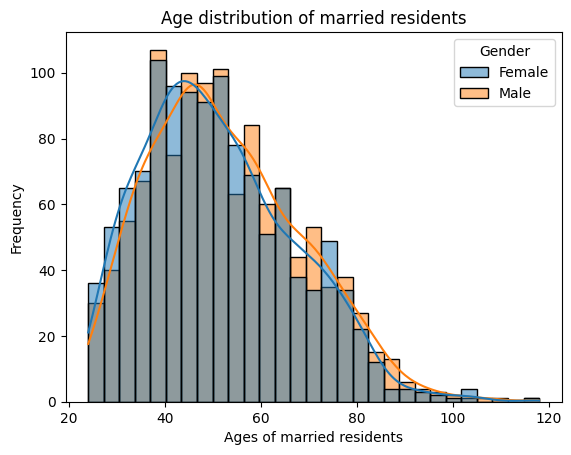

In [272]:

sns.histplot(data=mar_dat,x="Age",hue="Gender",kde=True)
plt.xlabel("Ages of married residents")
plt.ylabel("Frequency")
plt.title("Age distribution of married residents")
#plt.legend()
#plt.savefig("marriedhist.png")
plt.show()

#### Histogram for divorced residents

In [273]:
div_dat=pd.DataFrame(divorced)

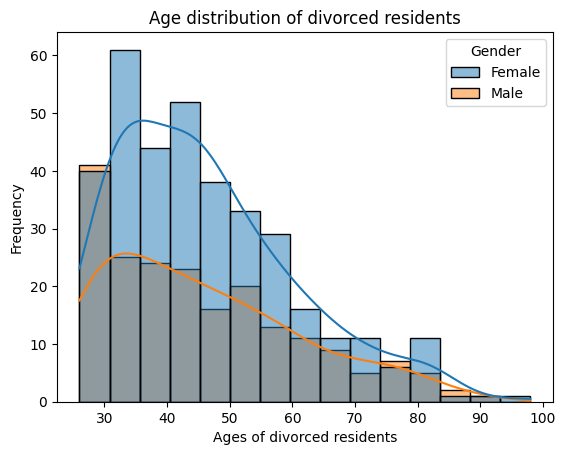

In [274]:

sns.histplot(data=div_dat,x="Age",hue="Gender",kde=True)
plt.xlabel("Ages of divorced residents")
plt.ylabel("Frequency")
plt.title("Age distribution of divorced residents")
#plt.legend()
#plt.savefig("divorcedhist.png")
plt.show()

##### Hypothesis Testing (Two sample proportion z-test)

###### Null Hypothesis: 
There is no significant difference between the proportions of married and divorced individuals.

###### Alternative Hypothesis:
There is a significant difference between the proportions of married and divorced individuals.


In [275]:
from statsmodels.stats.proportion import proportions_ztest

# Count the number of married and divorced individuals
num_married = df1[df1["Marital Status"] == "Married"].shape[0]
num_divorced = df1[df1["Marital Status"] == "Divorced"].shape[0]

# Calculate the total population
total_population = df1.shape[0]

# Perform the proportion test
count = [num_married, num_divorced]
nobs = [total_population, total_population]
stat, p_value = proportions_ztest(count, nobs)

# Print the results
print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the proportion of married and divorced individuals.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the proportion of married and divorced individuals.")


Z-statistic: 36.755050015219624
P-value: 9.655530571896137e-296
Reject the null hypothesis. There is a significant difference between the proportion of married and divorced individuals.


### 5. Occupancy rates

In [276]:
 # Check max House number
df1["House Number"].max()

np.int64(226)

##### Number of residents in each Household number

In [277]:
"""
The number of people in household is also determined by the street
Not just household number alone
"""
def household_num(i):
    count=len(df1[df1["House Number"]==i])
    return count
    

for i in df1["House Number"].unique() :
    number=household_num(i)
    print(f"There are {number} people in House {i} ")
    print("\n")

There are 439 people in House 1 


There are 251 people in House 2 


There are 258 people in House 3 


There are 285 people in House 4 


There are 261 people in House 5 


There are 222 people in House 6 


There are 216 people in House 7 


There are 227 people in House 8 


There are 206 people in House 9 


There are 217 people in House 10 


There are 208 people in House 11 


There are 190 people in House 12 


There are 173 people in House 13 


There are 184 people in House 14 


There are 189 people in House 15 


There are 144 people in House 16 


There are 148 people in House 17 


There are 159 people in House 18 


There are 140 people in House 19 


There are 135 people in House 20 


There are 111 people in House 21 


There are 100 people in House 22 


There are 102 people in House 23 


There are 116 people in House 24 


There are 122 people in House 25 


There are 101 people in House 26 


There are 73 people in House 27 


There are 78 people in House 28 


The

##### Number of streets holding residents in each Household number

In [278]:
Houses=[]

def streets_num_add(i):     # Get unique streets in each Household Number
    count=len( df1[ (df1["House Number"]==i) ]["Street"].unique() )
    return count
    

for i in df1["House Number"].unique() :  
    number1=streets_num_add(i)
    print(f"There are {number1} Streets with House number {i} ")
    print("\n")

There are 135 Streets with House number 1 


There are 90 Streets with House number 2 


There are 90 Streets with House number 3 


There are 90 Streets with House number 4 


There are 87 Streets with House number 5 


There are 82 Streets with House number 6 


There are 80 Streets with House number 7 


There are 75 Streets with House number 8 


There are 74 Streets with House number 9 


There are 72 Streets with House number 10 


There are 70 Streets with House number 11 


There are 69 Streets with House number 12 


There are 66 Streets with House number 13 


There are 65 Streets with House number 14 


There are 62 Streets with House number 15 


There are 57 Streets with House number 16 


There are 56 Streets with House number 17 


There are 53 Streets with House number 18 


There are 49 Streets with House number 19 


There are 47 Streets with House number 20 


There are 40 Streets with House number 21 


There are 40 Streets with House number 22 


There are 38 Stree

##### Average Occupnacy

In [279]:
 # Average occupancy value = add all values/ number of houses
 # Number of people in a particular house is done

NIHH=[]      #store number in households
def household_num(i):   #counts number of people in each household
    count=len(df1[df1["House Number"]==i])
    return count
    

for i in df1["House Number"].unique() :
    number=household_num(i)
    NIHH.append(number)  ### append number of people in each house 
    """
    The sum of NIHH should give you the total number of entries in the dataframe 8568
    The len should give you the total number of houses 226
    """
average_occupancy=sum(NIHH)/ len(NIHH)
print(f"Average occupancy for a given household is {round(average_occupancy,0)} ")

Average occupancy for a given household is 38.0 


In [280]:
Household=[]     

for i in df1["House Number"] :
    Household.append(i)

In [281]:
data_hs={"House Number":Household}
dataframe_hs=pd.DataFrame(data_hs)

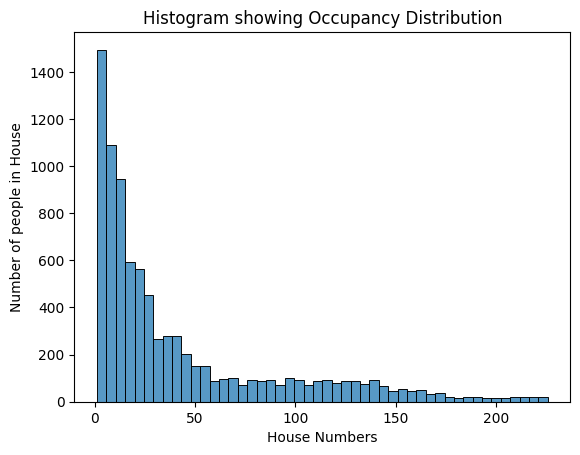

In [283]:

sns.histplot(data=dataframe_hs,x="House Number")
plt.xlabel("House Numbers")
plt.ylabel("Number of people in House")
plt.title("Histogram showing Occupancy Distribution")
#plt.savefig("Occupancy.png")
plt.show()

#### Number of people in Household above or below average house occupancy

In [284]:

for i in df1["House Number"].unique() :
    number=household_num(i)
    print(f"There are  {number} people in House {i} ")
    if number > average_occupancy:
        print(f"There should be {round(number-average_occupancy,0)} less individuals in House{i} ")
    elif number==average_occupancy:
        print(f"There is an optimal number of people in House {i}")
    else: # number<average_occupancy
        print(f"There should be {round(average_occupancy-number,0)} more people in House {i}")
    print("\n")

There are  439 people in House 1 
There should be 401.0 less individuals in House1 


There are  251 people in House 2 
There should be 213.0 less individuals in House2 


There are  258 people in House 3 
There should be 220.0 less individuals in House3 


There are  285 people in House 4 
There should be 247.0 less individuals in House4 


There are  261 people in House 5 
There should be 223.0 less individuals in House5 


There are  222 people in House 6 
There should be 184.0 less individuals in House6 


There are  216 people in House 7 
There should be 178.0 less individuals in House7 


There are  227 people in House 8 
There should be 189.0 less individuals in House8 


There are  206 people in House 9 
There should be 168.0 less individuals in House9 


There are  217 people in House 10 
There should be 179.0 less individuals in House10 


There are  208 people in House 11 
There should be 170.0 less individuals in House11 


There are  190 people in House 12 
There should be

#### Hypothesis Testing

##### Two sample Z-test for proportion

##### Null Hypothesis:
There is no significant difference between the proportion of people in the upper part of the town and the lower part.

##### Alternative Hypothesis:
There is a significant difference between the proportion of people in the upper part of the town and the lower part.

In [285]:

from statsmodels.stats.proportion import proportions_ztest

# Count the number of people in the upper part of the town
upper = df1[df1["House Number"].between(1, 112)].shape[0]


# Count the number of people in the lower part of the town
lower = df1[df1["House Number"].between(113, 226)].shape[0]


# Calculate the total population
total_population = df1.shape[0]

# Perform the proportion test
count = [upper, lower]
nobs = [total_population, total_population]
stat, p_value = proportions_ztest(count, nobs)

# Print the results
print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the proportion of people in the upper part of the town and the lower part.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the proportion of people in the upper part of the town and the lower part.")


Z-statistic: 98.42286196426228
P-value: 0.0
Reject the null hypothesis. There is a significant difference between the proportion of people in the upper part of the town and the lower part.


#### Rates

In [286]:
upper_rate=(upper/df1.shape[0])*1000
print(f"There is a rate of {round(upper_rate,0)} per 1000 for the upper part of the town")

There is a rate of 876.0 per 1000 for the upper part of the town


In [287]:
lower_rate=(lower/df1.shape[0])*1000
print(f"There is a rate of {round(lower_rate,0)} per 1000 for the lower part of the town")

There is a rate of 124.0 per 1000 for the lower part of the town


### 6. Students

In [288]:
 # Filter DataFrame for Students
students=df1[
df1["Occupation"].str.contains("Student")
]
#students

##### Rate of all students

student rate=(num_students/tot.population)*1000

In [289]:
len(students)

2330

In [290]:
st_rate=(len(students)/len(df1))*1000
print(f"The rate of all students is {round(st_rate,0)} per 1000")

The rate of all students is 272.0 per 1000


##### Primary and High school

In [291]:
students1=df1[
(df1["Age"] < 15) &  (df1["Occupation"].str.contains("Student"))
]
len(students1)

1280

In [292]:
st1_rate=(len(students1)/len(df1))*1000
print(f"The rate of primary and high school students is {round(st1_rate,0)} per 1000")

The rate of primary and high school students is 149.0 per 1000


### 6ii. Univeristy Students

Commuters : There is no university so these are part of commuters

In [293]:
# Filter DataFrame for Students
uni_students = df1[
    df1["Occupation"].str.contains("University Student|PhD Student", case=False, na=False)
]
#uni_students


##### Rate of University Students

In [294]:
len(uni_students)

583

In [295]:
uni_st_rate=(len(uni_students)/len(df1))*1000
print(f"The rate of university students is {round(uni_st_rate,2)} per 1000 ")

The rate of university students is 68.04 per 1000 


#### Histogram for Students

In [296]:
students["Occupation"].unique()

array(['Student', 'University Student', 'PhD Student'], dtype=object)

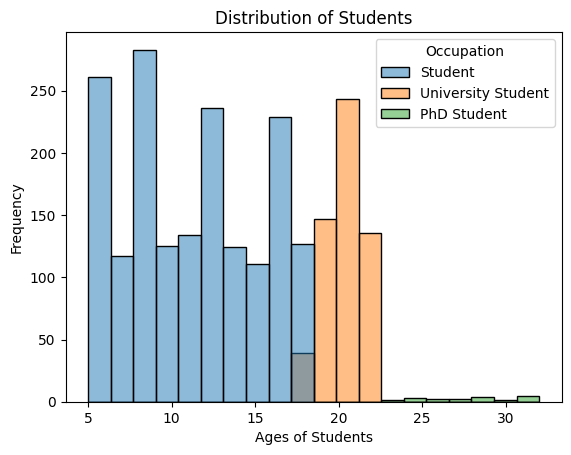

In [297]:
sns.histplot(data=students,x="Age",hue="Occupation")
plt.xlabel("Ages of Students")
plt.ylabel("Frequency")
plt.title("Distribution of Students")
plt.savefig("HistogramStudent.png")
plt.show()

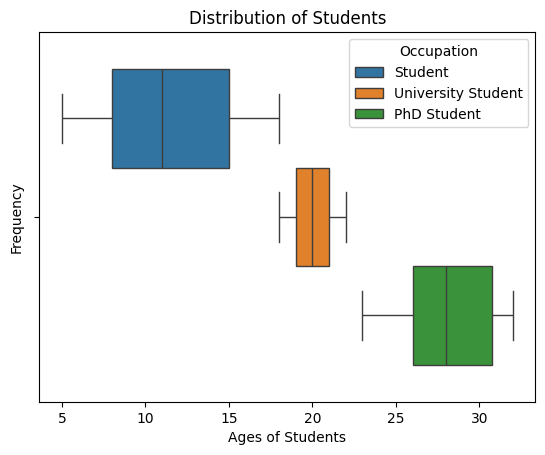

In [298]:
sns.boxplot(data=students,x="Age",hue="Occupation")
plt.xlabel("Ages of Students")
plt.ylabel("Frequency")
plt.title("Distribution of Students")
plt.savefig("BoxplotStudent.png")
plt.show()

#### Potential commuters

In [299]:
 # Age bracket for students commuting will be above 18
 # Age bracket for employment status is 18-66. So we are looking at 18-66
 
 # Filter by Age,and Occupation (Need those employed or not retired)
potent_commuters = df1[ 
    (df1["Age"].between(18,66) ) & 
    ~( df1["Occupation"].str.contains("Unemployed|Retired|Teacher", case=False ,na=False)  ) &
    ~(df1["Occupation"]=="Student")  #Those who are not in the university do not commute
] 

 # prints those who are not unemployed or not retired
#sorted(potent_commuters["Occupation"].unique())

In [300]:
commuters_num=potent_commuters.shape[0]
total_population= df1.shape[0]
fraction_commuters= commuters_num/total_population
comm_rate=(fraction_commuters)*1000

print(f"There are {commuters_num} commuters including university students")
print("Rate of commuters is : ", round(comm_rate,0))
print("\n")

 # Other potential commuters are the entire potential commuters minus the number of university students
oth_commuters=commuters_num-len(uni_students)
print(f"Commuters excluding univeristy students are {oth_commuters} ")

fraction_oth_commuters= oth_commuters/total_population
oth_comm_rate=(fraction_oth_commuters)*1000
print("Rate of commuters excluding students is : ", round(oth_comm_rate,0))

There are 4995 commuters including university students
Rate of commuters is :  583.0


Commuters excluding univeristy students are 4412 
Rate of commuters excluding students is :  515.0


#### Non-commuters

In [301]:
Non_commuters = df1[
    (df1["Age"].between(0, 120)) & 
    (df1["Occupation"].str.contains("Unemployed|Retired|Teacher", case=False, na=False)) & 
    ~(df1["Occupation"].str.contains("University Student|PhD Student", case=False, na=False))
].shape[0]
print(f"There are {Non_commuters} non commuters")

There are 1333 non commuters


In [302]:
non_commuter_rate=(Non_commuters/df1.shape[0])*1000
print(f"Rate of non-commuters is {round(non_commuter_rate,0)} per 1000")

Rate of non-commuters is 156.0 per 1000


#### Hypothesis Testing

#### Two sample z-test for proportion 

##### Null Hypothesis :
There is no significant difference between the proportion of potential commuters and non-commuters.

##### Alternative Hypothesis:
There is a significant difference between the proportion of potential commuters and non-commuters.


In [303]:

from statsmodels.stats.proportion import proportions_ztest

# Count the number of potential commuters
potential_commuters = df1[
    (df1["Age"].between(18, 66)) & 
    ~(df1["Occupation"].str.contains("Unemployed|Retired|Teacher", case=False, na=False))
].shape[0]

# Count the number of non-commuters excluding University Students and PhD Students
non_commuters = df1[
    (df1["Age"].between(0, 120)) & 
    (df1["Occupation"].str.contains("Unemployed|Retired|Teacher", case=False, na=False)) & 
    ~(df1["Occupation"].str.contains("University Student|PhD Student", case=False, na=False))
].shape[0]

# Calculate the total population
total_population = df1.shape[0]

# Perform the proportion test
count = [potential_commuters, non_commuters]
nobs = [total_population, total_population]
stat, p_value = proportions_ztest(count, nobs)

# Print the results
print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the proportion of potential commuters and non-commuters.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the proportion of potential commuters and non-commuters.")



Z-statistic: 59.734502523493475
P-value: 0.0
Reject the null hypothesis. There is a significant difference between the proportion of potential commuters and non-commuters.


### 7. Birth and Death rates

##### Birth rate

In [304]:
 #Extract sum of ages=0
number_babies1=df1[ df1["Age"]==0 ].shape[0] 
print(number_babies1)

81


In [305]:
 # Extract women aged 25-29 as women of child bearing age
fertile_women1=df1[ (  ( df1["Age"] >=25 ) & ( df1["Age"]<=29 ) & (df1["Gender"]=="Female")  ) ].shape[0]
print(fertile_women1)

296


In [306]:
birth_rate1 = (number_babies1/fertile_women1)*1000  #assumptions used on formula
birth_rate1
print(f"birth rate is {round(birth_rate1,0)} per 1000")

birth rate is 274.0 per 1000


##### Evolving birth rate

Assuming the birth rate is calculated again in the next four years.

Children will now be 4 years

In [307]:
aged4=len( df1[ df1["Age"]==4 ]["Age"] )
print(f"There are {aged4} children aged 4")

 # Extract women aged 30-34  groups of interest should be 5 
fertile_women1=len(df1[ (  ( df1["Age"] >=30 ) & ( df1["Age"]<=34 ) & (df1["Gender"]=="Female")  ) ]["Age"])
print(f"There are {fertile_women1} fertile women between ages 30-34")

There are 104 children aged 4
There are 369 fertile women between ages 30-34


In [308]:
birth_rate2 = (aged4/fertile_women1)*1000
print(f"Evolving birth rate is {round(birth_rate2,0)} per 1000")
print(f"For every 1000 births,we have an average of {round(birth_rate2,0)} births")

Evolving birth rate is 282.0 per 1000
For every 1000 births,we have an average of 282.0 births


#### Histogram for births

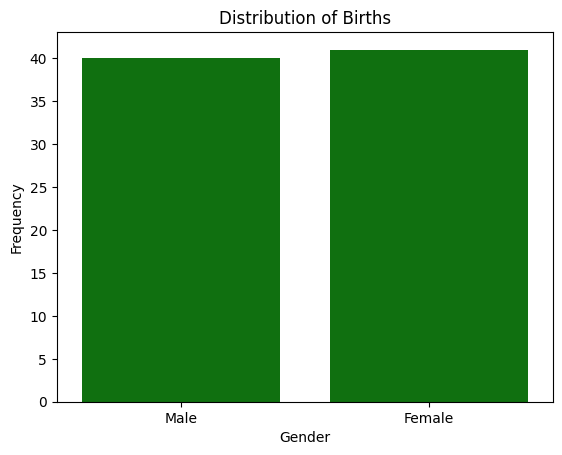

In [310]:
babies=df1[df1["Age"]==0]

sns.countplot(data=babies,x="Gender",color="green")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of Births")
#plt.savefig("births.png")
plt.show()

In [311]:
male_babies=df1[(df1["Age"]==0) & (df1["Gender"]=="Male")]
len(male_babies)

40

In [312]:
female_babies=df1[(df1["Age"]==0) & (df1["Gender"]=="Female")]
len(female_babies)

41

##### Fertile women (Future pregnancies)

In [313]:
future_pregancies=df1[(df1["Age"].between(0,17)) & (df1["Gender"]=="Female")].shape[0]
print(future_pregancies)

fertile_women=df1[(df1["Age"].between(20,35)) & (df1["Gender"]=="Female")].shape[0]
print(fertile_women)

1024
1059


In [314]:
possible=(fertile_women/df1.shape[0])*1000
print(f"The rate of possible pregnancies is {round(possible,0)} per 1000")

The rate of possible pregnancies is 124.0 per 1000


In [315]:
future=(future_pregancies/df1.shape[0])*1000
print(f"The rate of future pregnancies is {round(future,0)} per 1000")

The rate of future pregnancies is 120.0 per 1000


### Hypothesis Testing

#### Two sample z-test for proportion 

##### Null Hypothesis :
There is no significant difference between the proportion of potential future pregnancies and the proportion of fertile women.

##### Alternative Hypothesis:
There is a significant difference between the proportion of potential future pregnancies and the proportion of fertile women


In [316]:

from statsmodels.stats.proportion import proportions_ztest

# Count the number of possible future pregnancies (females aged 0-17)
future_pregnancies = df1[(df1["Age"].between(0, 17)) & (df1["Gender"] == "Female")].shape[0]
print(future_pregnancies)

# Count the number of fertile women (females aged 20-35)
fertile_women = df1[(df1["Age"].between(20, 35)) & (df1["Gender"] == "Female")].shape[0]
print(fertile_women)

# Calculate the total population
total_population = df1.shape[0]

# Perform the proportion test
count = [future_pregnancies, fertile_women]
nobs = [total_population, total_population]
stat, p_value = proportions_ztest(count, nobs)

# Print the results
print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the proportion of potential future pregnancies and the proportion of fertile women.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between proportion of potential future pregnancies and the proportion of fertile women.")


1024
1059
Z-statistic: -0.818213433120913
P-value: 0.413235326052274
Fail to reject the null hypothesis. There is no significant difference between proportion of potential future pregnancies and the proportion of fertile women.


##### Death rates

In [317]:
age56_60=len( df1[ ( df1["Age"]>=56) & ( df1["Age"]<=60 ) ] )
print(f"There are {age56_60} adults aged 56-60")

age61_65=len( df1[ ( df1["Age"]>=61) & ( df1["Age"]<=65 ) ] )    
print(f"There are {age61_65} adults aged 61-65")



There are 458 adults aged 56-60
There are 351 adults aged 61-65


In [318]:
Death_rate1=( (age56_60-age61_65) / 5)*1000
print(f"Death rate is {round(Death_rate1,2)}")

Death rate is 21400.0


In [319]:
age66_70=len( df1[ ( df1["Age"]>=66) & ( df1["Age"]<=70 ) ] )
print(f"There are {age66_70} adults aged 66-70")

age71_75=len( df1[ ( df1["Age"]>=71) & ( df1["Age"]<=75 ) ] )
print(f"There are {age71_75} adults aged 71-75")


There are 271 adults aged 66-70
There are 224 adults aged 71-75


In [320]:
Death_rate2=( (age66_70-age71_75) / 5)*1000
print(f"Death rate is {round(Death_rate2,2)}")

Death rate is 9400.0


In [321]:
age76_80=len( df1[ ( df1["Age"]>=76) & ( df1["Age"]<=80 ) ] )
print(f"There are {age76_80} adults aged 76-80")

age81_84=len( df1[ ( df1["Age"]>=81) & ( df1["Age"]<=84 ) ] )
print(f"There are {age81_84} adults aged 81-84")
print("\n")
Death_rate3=( (age76_80-age81_84) / 5)*1000
print(f"Death rate is {round(Death_rate3,2)}")


There are 161 adults aged 76-80
There are 89 adults aged 81-84


Death rate is 14400.0


In [324]:
age85_90=len( df1[ ( df1["Age"]>=85) & ( df1["Age"]<=90 ) ] )
print(f"There are {age85_90} adults aged 85-90")

age91_95=len( df1[ ( df1["Age"]>=91) & ( df1["Age"]<=95 ) ] )
print(f"There are {age91_95} adults aged 91-95")
print("\n")
Death_rate4=( (age85_90-age91_95) / 5)*1000
print(f"Death rate is {round(Death_rate4,2)}")


There are 52 adults aged 85-90
There are 15 adults aged 91-95


Death rate is 7400.0


In [325]:
age96_100=len( df1[ ( df1["Age"]>=96) & ( df1["Age"]<=100 ) ] )
print(f"There are {age96_100} adults aged 96-100")

age101_105=len( df1[ ( df1["Age"]>=101) & ( df1["Age"]<=105 ) ] )
print(f"There are {age101_105} adults aged 101-105")
print("\n")
Death_rate5=( (age96_100-age101_105) / 5)*1000
print(f"Death rate is {round(Death_rate5,2)}")


There are 14 adults aged 96-100
There are 8 adults aged 101-105


Death rate is 1200.0


In [326]:
age106_110=len( df1[ ( df1["Age"]>=106) & ( df1["Age"]<=110 ) ] )
print(f"There are {age106_110} adults aged 106-110")

age111_115=len( df1[ ( df1["Age"]>=111) & ( df1["Age"]<=115 ) ] )
print(f"There are {age111_115} adults aged 111-115")
print("\n")
Death_rate6=( (age106_110-age111_115) / 5)*1000
print(f"Death rate is {round(Death_rate6,2)}")
print("Death rate decreased here due to few number of adults")



There are 2 adults aged 106-110
There are 1 adults aged 111-115


Death rate is 200.0
Death rate decreased here due to few number of adults


In [327]:
age116_120=len( df1[ ( df1["Age"]>=116) & ( df1["Age"]<=120 ) ] )
print(f"There are {age116_120} adults aged 116-120")

age_max=df1["Age"].max()
print(f"The maximum age value is: {age_max} years")
#age111_115=len( df[ ( df["Age"]>=111) & ( df["Age"]<=115 ) ] )
#print(f"There are {age111_115} adults aged 111-115")
print("\n")
#Death_rate6=( (age106_110-age111_115) / 5)*100000
#print(f"Death rate is {round(Death_rate6,2)}")
#print("Death rate decreased here")



There are 2 adults aged 116-120
The maximum age value is: 118 years




In [328]:
Total_dr= Death_rate1+Death_rate2+Death_rate3+Death_rate4+Death_rate5+Death_rate6
print(f"Total death rate is: {Total_dr} per 1000")

Total death rate is: 54000.0 per 1000


#### Hypothesis Testing

#### Two sample z-test for proportion 

##### Null Hypothesis:
There is no significant difference between the proportion of births and deaths.

##### Alternative Hypothesis:
There is a significant difference between the proportion of births and deaths.

In [329]:

from statsmodels.stats.proportion import proportions_ztest

# Count the number of births (number of babies)
number_babies = df1[df1["Age"] == 0].shape[0]


# Calculate the total number of deaths
total_deaths = age56_60 + age61_65 + age66_70 + age71_75 + age76_80 + age81_84 + age85_90 + age91_95 + age96_100 + age101_105 + age106_110 + age111_115 + age116_120

# Calculate the total population
total_population = df1.shape[0]

# Perform the proportion test
count = [number_babies, total_deaths]
nobs = [total_population, total_population]
stat, p_value = proportions_ztest(count, nobs)

# Print the results
print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the proportion of births and the proportion of deaths.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the proportion of births and the proportion of deaths.")


Z-statistic: -39.74359835934943
P-value: 0.0
Reject the null hypothesis. There is a significant difference between the proportion of births and the proportion of deaths.


### 8. Infirmity

In [330]:
df1

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Blue Avenue,Annette,Thompson,78,Head,Married,Female,Retired Licensed conveyancer,Unknown,Christian
1,1,Blue Avenue,Iain,Thompson,79,Husband,Married,Male,"Retired Engineer, technical sales",Unknown,No Religion
2,2,Blue Avenue,Angela,Wright,43,Head,Single,Female,Magazine journalist,Unknown,No Religion
3,3,Blue Avenue,Lynda,Ahmed,34,Head,Married,Female,Unemployed,Unknown,No Religion
4,3,Blue Avenue,Howard,Ahmed,35,Husband,Married,Male,Analytical chemist,Unknown,No Religion
...,...,...,...,...,...,...,...,...,...,...,...
8563,1,Clarke Barn,Gillian,Griffiths,43,Head,Single,Female,Multimedia specialist,Unknown,Christian
8564,1,Clarke Barn,Raymond,Roberts,42,Partner,Single,Male,Hospital pharmacist,Unknown,Christian
8565,1,Clarke Barn,Tina,Griffiths,9,Daughter,Not Applicable,Female,Student,Unknown,Christian
8566,1,Clarke Barn,Matthew,Griffiths,6,Son,Not Applicable,Male,Student,Unknown,Christian


In [331]:
df1["Infirmity"].unique()

array(['Unknown', 'Physical Disability', 'Disabled', 'Mental Disability',
       'Deaf', 'Blind', 'Unknown Infection'], dtype=object)

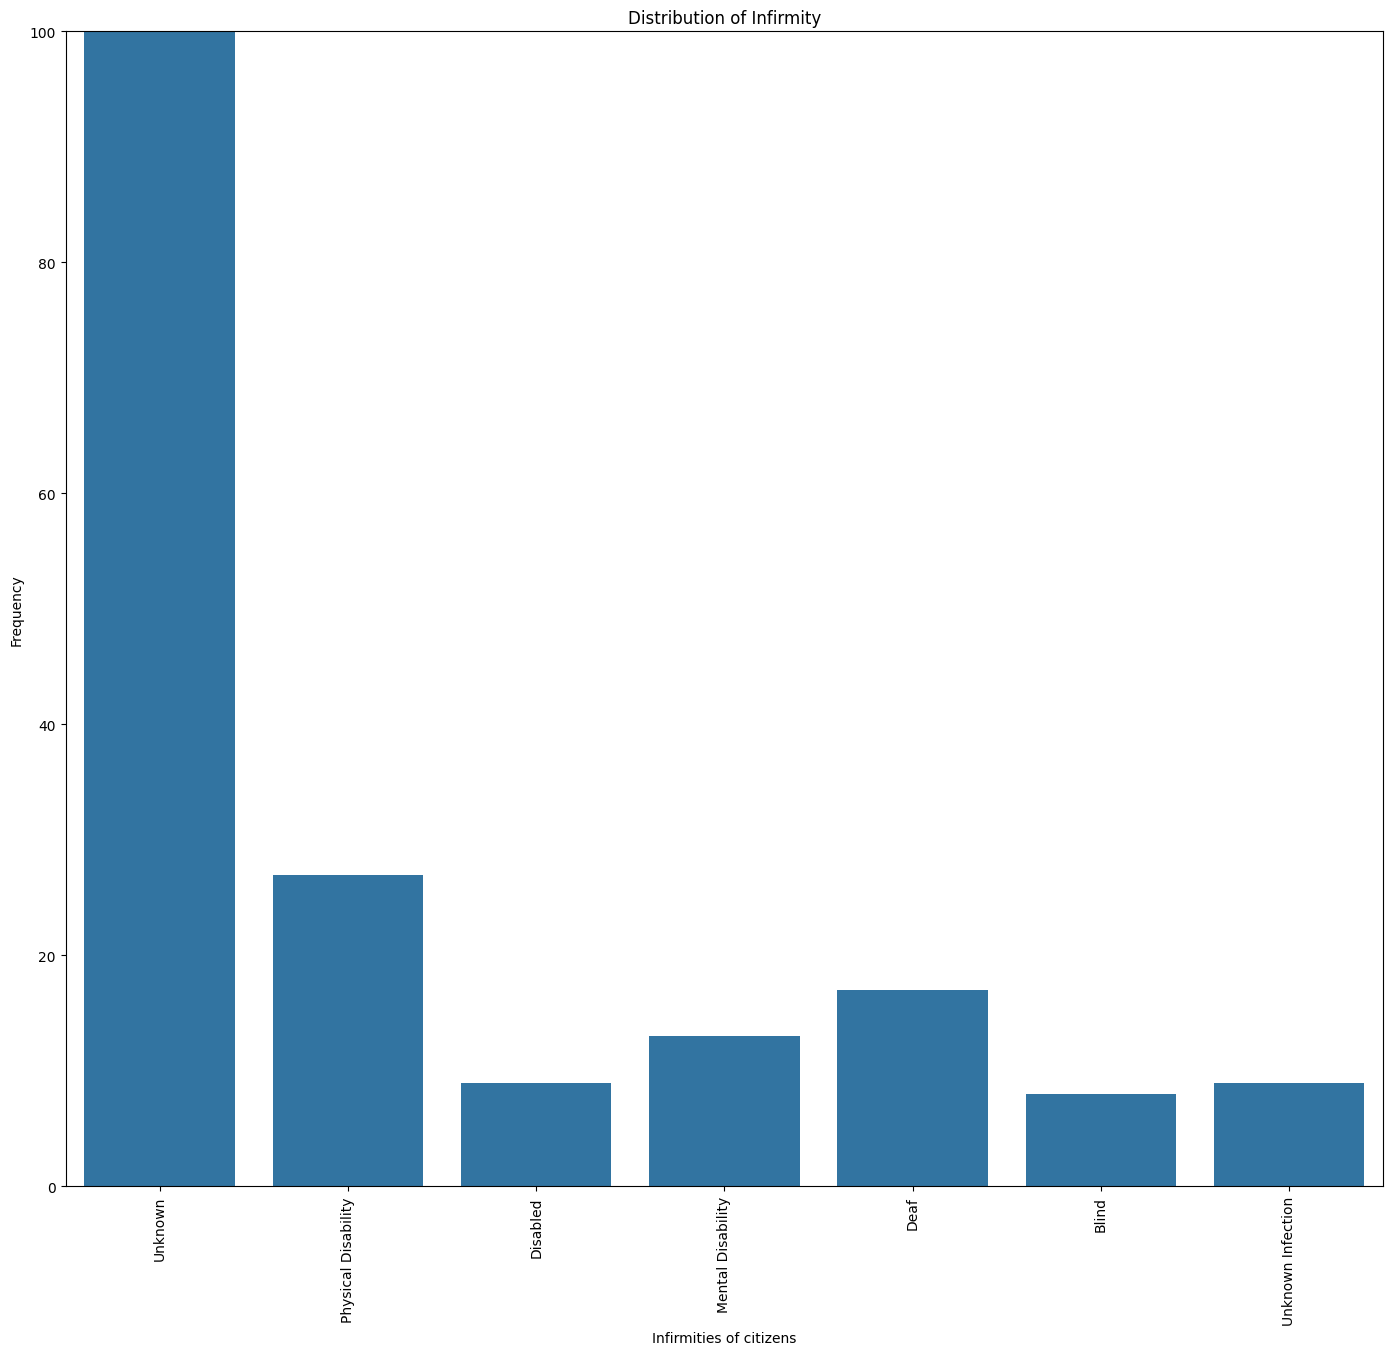

In [332]:
inf_dat=df1[["Infirmity"]]
inf_dat

plt.figure(figsize=(17,15))
sns.countplot(data=inf_dat,x="Infirmity")
plt.xlabel("Infirmities of citizens")
plt.ylabel("Frequency")
plt.title("Distribution of Infirmity")
plt.ylim(0,100)
plt.xticks(rotation=90)

#plt.savefig("Infirmity.png")
plt.show()

#### Hypothesis Testing

#### Two sample z-test for proportion 

##### Null Hypothesis:
There is no significant difference between the proportion of people with infirmities and those with no or unknown infirmities.

##### Alternative Hypothesis:
There is a significant difference between the proportion of people with infirmities and those with no or unknown infirmities.

In [333]:
infirmity_count = df1[df1["Infirmity"].str.contains(
    'Physical Disability|Disabled|Mental Disability|Deaf|Blind|Unknown Infection', case=False,na=False)].shape[0]

non_infirmity_count = df1[df1["Infirmity"].str.contains('Unknown',case=False,na=False)].shape[0]


In [334]:
from statsmodels.stats.proportion import proportions_ztest

# Count the number of individuals with infirmities
infirmity_count = df1[df1["Infirmity"].str.contains(
    'Physical Disability|Disabled|Mental Disability|Deaf|Blind|Unknown Infection', case=False, na=False)].shape[0]

# Count the number of individuals with "Unknown OR No" infirmity status
non_infirmity_count = df1[df1["Infirmity"].str.contains('Unknown', case=False, na=False)].shape[0]

# Calculate the total population
total_population = df1.shape[0]

# Perform the proportion test
count = [infirmity_count, non_infirmity_count]
nobs = [total_population, total_population]
stat, p_value = proportions_ztest(count, nobs)

# Print the results
print(f"Z-statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the proportion of individuals with infirmities and those with 'Unknown or No' infirmity status.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the proportion of individuals with infirmities and those with 'Unknown or No' infirmity status.")


Z-statistic: -128.50592187068554
P-value: 0.0
Reject the null hypothesis. There is a significant difference between the proportion of individuals with infirmities and those with 'Unknown or No' infirmity status.


In [335]:
# Calculate the count of individuals with specified infirmities
infirmity_count = df1[df1["Infirmity"].str.contains(
    'Physical Disability|Disabled|Mental Disability|Deaf|Blind|Unknown Infection', case=False,na=False)].shape[0]

# Print the result
infirmity_count


83

In [336]:
rate=(infirmity_count/df1.shape[0])*1000
print(f"The rate of Infirmity is : {round(rate,0)} per 1000")

The rate of Infirmity is : 10.0 per 1000


In [337]:
non_infirmity_count = df1[df1["Infirmity"].str.contains('Unknown',case=False,na=False)].shape[0]

 # Print the result
print(non_infirmity_count)

8494


In [338]:
rate1=(non_infirmity_count/df1.shape[0])*1000
print(f"The rate of healthy individuals is : {round(rate1,0)} per 1000")

The rate of healthy individuals is : 991.0 per 1000
